In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [103]:
df1 = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\서울시 따릉이대여소 마스터 정보.csv', encoding='cp949')
df1['자치구'] = ''

In [104]:
df1.head()

,대여소_ID,주소1,주소2,위도,경도,자치구
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000,
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000,
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598,
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548,
4,ST-995,서울특별시 양천구 신정동 621-14,계남공원 입구 주출입구 좌측,37.510681,126.857399,


In [105]:
df1[df1.iloc[:,3] == 0]

,대여소_ID,주소1,주소2,위도,경도,자치구
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.0,0.0,
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.0,0.0,
11,ST-989,서울특별시 마포구 월드컵로5길 11,합정동 주민센터,0.0,0.0,
156,ST-858,서울특별시 강북구 덕릉로40길 48,번동 619-53,0.0,0.0,
171,ST-844,서울특별시 성북구 인촌로 16,성북구 안암동2가 140-1,0.0,0.0,
...,...,...,...,...,...,...
3055,ST-1060,서울특별시 강동구 둔촌동 산125,일자산 체육관,0.0,0.0,
3088,ST-1030,서울특별시 은평구 녹번동 141-92,유성빌딩 옆,0.0,0.0,
3096,ST-1022,서울특별시 은평구 진관동 2-6,입곡삼거리,0.0,0.0,
3111,ST-1009,서울특별시 양천구 신월동 263,신월 청소년 문화센터,0.0,0.0,


In [106]:
for x in range(len(df1)) :
    tmp = df1.iloc[x, 1].split(' ')[1]
    if tmp[-1] == '구' :
        df1.iloc[x, 5] = tmp
    else :
        print(x, df1.iloc[x])
df1

,대여소_ID,주소1,주소2,위도,경도,자치구
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000,양천구
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000,양천구
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598,양천구
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548,양천구
4,ST-995,서울특별시 양천구 신정동 621-14,계남공원 입구 주출입구 좌측,37.510681,126.857399,양천구
...,...,...,...,...,...,...
3118,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,양천구
3119,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000,양천구
3120,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,양천구
3121,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,광진구


In [138]:
#df1[df1.iloc[:,3] != 0].set_index('대여소_ID').to_csv('C:\\df.csv', encoding = 'cp949') # 따릉이 정류소 마스터 QGIS용 생성

In [8]:
pivot1 = pd.pivot_table(data = df1, index = '자치구', values = '대여소_ID', aggfunc = 'count')
pivot1 = pivot1.sort_values('대여소_ID', ascending = False)
pivot1 = pivot1.rename(columns = {'대여소_ID' : '대여소(개)'})
pivot1.head()

,대여소(개)
자치구,
송파구,232
강서구,212
강남구,180
영등포구,172
서초구,160


In [9]:
df2 = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\tpss_bcycl_od_statnhm_202207\\tpss_bcycl_od_statnhm_20220701.csv', encoding = 'cp949')

In [10]:
print(len(df2))

305897


In [11]:
df2.head()

,기준_날짜,기준_시간,시작_대여소,종료_대여소,전 체건수,전체_이용_분,전체_이용_거리
0,20220701,0,ST-2605,ST-2605,1,49,0
1,20220701,0,ST-2840,ST-2840,1,16,2750
2,20220701,0,ST-368,ST-112,1,3,528
3,20220701,0,ST-2749,ST-1420,1,6,1190
4,20220701,0,ST-668,ST-1933,1,33,4100


In [18]:
pivot_1 = pd.pivot_table(data = df2, index = '시작_대여소', values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜', ascending = False).head()
pivot_1.index.name = '대여소(대여)'
pivot_1 = pivot_1.rename(columns = {'기준_날짜' : '횟수'})
pivot_1

,횟수
대여소(대여),
ST-2031,1294
ST-891,867
ST-1718,771
ST-668,757
ST-1065,754


In [19]:
pivot_1 = pd.pivot_table(data = df2, index = '종료_대여소', values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜', ascending = False).head()
pivot_1.index.name = '대여소(반납)'
pivot_1 = pivot_1.rename(columns = {'기준_날짜' : '횟수'})
pivot_1

,횟수
대여소(반납),
CENTER,1459
ST-2031,1298
ST-891,886
ST-1718,786
ST-1996,771


In [20]:
df3 = pd.DataFrame(pivot1)
df3.columns = ['정류소(개)']
df3 = df3.sort_index()
df3['시작(횟수)'] = 0
df3['종료(횟수)'] = 0

In [21]:
df3.head()

,정류소(개),시작(횟수),종료(횟수)
자치구,,,
강남구,180,0,0
강동구,131,0,0
강북구,70,0,0
강서구,212,0,0
관악구,99,0,0


In [22]:
a = time.time()
dic1 = {}
for Gu in pivot1.index.sort_values() :
    dic1[Gu] = 0
dic2 = dict(dic1)

aa = pd.pivot_table(data = df2, index = '시작_대여소', values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜')
bb = pd.pivot_table(data = df2, index = '종료_대여소', values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜')

for idx in range(len(aa)) :
    try :
        tmp1 = aa.iloc[idx].name 
        dic1[df1[df1['대여소_ID'] == tmp1].iloc[0,-1]] += aa.iloc[idx,0]
    except :
        print(tmp1)
print(dic1)

for idx in range(len(bb)) :
    try :
        tmp2 = bb.iloc[idx].name 
        dic2[df1[df1['대여소_ID'] == tmp2].iloc[0,-1]] += bb.iloc[idx,0]
    except :
        print(tmp2)
print(dic2)

print('작업시간 : {:.2f}초'.format(time.time() - a))

ST-2426
{'강남구': 9664, '강동구': 13668, '강북구': 4120, '강서구': 36091, '관악구': 7093, '광진구': 13324, '구로구': 11798, '금천구': 5583, '노원구': 16920, '도봉구': 6149, '동대문구': 10619, '동작구': 6206, '마포구': 16171, '서대문구': 6169, '서초구': 8544, '성동구': 11587, '성북구': 7140, '송파구': 28481, '양천구': 18435, '영등포구': 25021, '용산구': 6536, '은평구': 7819, '종로구': 11799, '중구': 8562, '중랑구': 8396}
CENTER
{'강남구': 8935, '강동구': 13873, '강북구': 4020, '강서구': 36083, '관악구': 7040, '광진구': 13457, '구로구': 11616, '금천구': 5487, '노원구': 17131, '도봉구': 6224, '동대문구': 11001, '동작구': 6458, '마포구': 16254, '서대문구': 5993, '서초구': 8562, '성동구': 11557, '성북구': 7241, '송파구': 28389, '양천구': 18647, '영등포구': 24417, '용산구': 6522, '은평구': 8091, '종로구': 11102, '중구': 7742, '중랑구': 8596}
작업시간 : 4.10초


In [23]:
for x in dic1 :
    df3.loc[x, '시작(횟수)'] = dic1[x]
    df3.loc[x, '종료(횟수)'] = dic2[x]
df3.head()

,정류소(개),시작(횟수),종료(횟수)
자치구,,,
강남구,180,9664,8935
강동구,131,13668,13873
강북구,70,4120,4020
강서구,212,36091,36083
관악구,99,7093,7040


In [24]:
print('정류소 한 개 당 24시간 동안 따릉이 평균 운행 횟수 : {:.2f}회 / 2022년 7월 1일 기준'.format(len(df2) / len(df1)))

정류소 한 개 당 24시간 동안 따릉이 평균 운행 횟수 : 97.95회 / 2022년 7월 1일 기준


각 자치구 별 인구 구해서 넣고 visulaize

In [25]:
df4 = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\자치구_인구.csv', encoding = 'cp949')
df4.rename(columns = {'행정구역별(읍면동)' : '자치구'}, inplace = True)
df4.head()

,자치구,총인구(명),남자(명),여자(명)
0,종로구,148857,71367,77490
1,중구,126310,60657,65653
2,용산구,221688,106910,114778
3,성동구,286469,139181,147288
4,광진구,347099,166469,180630


In [26]:
df4.iloc[:,1]

0     148857
1     126310
2     221688
3     286469
4     347099
5     348201
6     380307
7     435509
8     292611
9     309200
10    503929
11    457385
12    314547
13    365192
14    433373
15    559837
16    426220
17    247398
18    402984
19    388094
20    495777
21    392302
22    503019
23    634720
24    451099
Name: 총인구(명), dtype: int64

In [27]:
df3 = pd.merge(df3, df4, on = '자치구')
df3.head()

,자치구,정류소(개),시작(횟수),종료(횟수),총인구(명),남자(명),여자(명)
0,강남구,180,9664,8935,503019,240842,262177
1,강동구,131,13668,13873,451099,220916,230183
2,강북구,70,4120,4020,292611,141265,151346
3,강서구,212,36091,36083,559837,268530,291307
4,관악구,99,7093,7040,495777,247814,247963


In [28]:
df3.iloc[:,4].head()

0    503019
1    451099
2    292611
3    559837
4    495777
Name: 총인구(명), dtype: int64

In [29]:
df3['탑승 per 정류소'] = df3['시작(횟수)'] / df3['정류소(개)']
df3['하차 per 정류소'] = df3['종료(횟수)'] / df3['정류소(개)']
df3['탑승 per 인구'] = df3['시작(횟수)'] / df3['총인구(명)']
df3['하차 per 인구'] = df3['종료(횟수)'] / df3['총인구(명)']

In [30]:
df3.head()

,자치구,정류소(개),시작(횟수),종료(횟수),총인구(명),남자(명),여자(명),탑승 per 정류소,하차 per 정류소,탑승 per 인구,하차 per 인구
0,강남구,180,9664,8935,503019,240842,262177,53.688889,49.638889,0.019212,0.017763
1,강동구,131,13668,13873,451099,220916,230183,104.335878,105.900763,0.030299,0.030754
2,강북구,70,4120,4020,292611,141265,151346,58.857143,57.428571,0.014080,0.013738
3,강서구,212,36091,36083,559837,268530,291307,170.240566,170.202830,0.064467,0.064453
4,관악구,99,7093,7040,495777,247814,247963,71.646465,71.111111,0.014307,0.014200


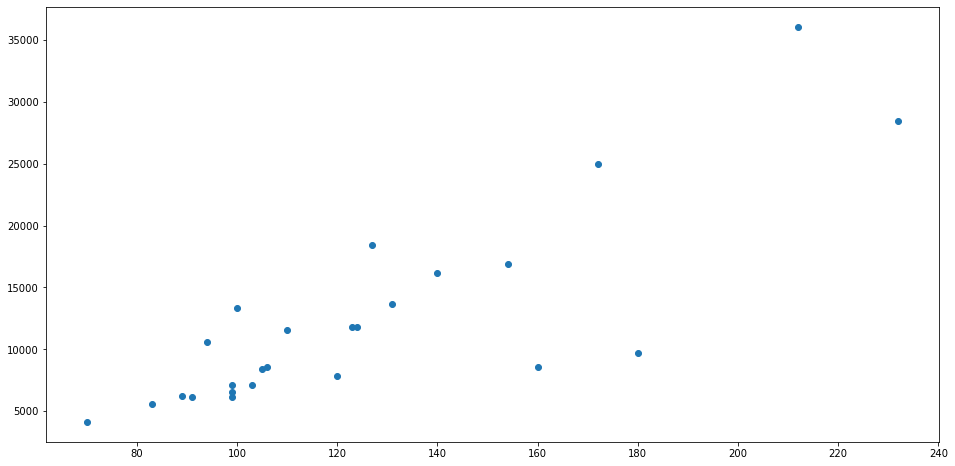

In [31]:
plt.figure(figsize = (16,8))
plt.plot(df3['정류소(개)'], df3['시작(횟수)'], 'o', label = df3['자치구'])
plt.show()

In [32]:
tmp_ = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\서울특별시 공공자전거 대여이력 정보_22.06.csv', encoding = 'cp949')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\서울특별시 공공자전거 대여이력 정보_22.06.csv'

In [3]:
len(tmp_)

4196985

In [36]:
a = tmp_.iloc[:30000, :]

In [65]:
# 하루 단위로 하고 싶으면 slice(0,10)으로 하면 됨
a['tmp'] = a.대여일시.str.slice(0,7)

C:\Users\Lee\AppData\Local\Temp/ipykernel_9452/3069630436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['tmp'] = a.대여일시.str.slice(0,7)


In [66]:
pd.DataFrame(a['tmp'].value_counts().sort_index())

,tmp
2022-06,30000


In [59]:
tmp_1 = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\공공자전거 대여이력 정보_2112.csv', encoding = 'cp949')

In [60]:
tmp_1.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53035,2021-12-01 09:45:56,3,중랑센터,0,2021-12-01 09:58:57,646,장한평역 1번출구 (국민은행앞),0,13,0.00
1,SPB-40999,2021-12-05 16:02:31,3,중랑센터,0,2021-12-05 16:07:58,529,장한평역 8번 출구 앞,0,5,0.00
2,SPB-55934,2021-12-10 22:01:39,3,중랑센터,0,2021-12-10 22:40:27,1332,석계역 5번출구 건너편,0,38,8710.00
3,SPB-50913,2021-12-11 07:01:32,3,중랑센터,0,2021-12-11 07:11:11,540,군자역 7번출구 베스트샵 앞,0,9,0.00
4,SPB-31324,2021-12-15 16:02:04,3,중랑센터,0,2021-12-15 16:13:21,540,군자역 7번출구 베스트샵 앞,0,11,2161.63


In [61]:
tmp_.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-59614,2022-06-01 06:36:04,668,서울축산농협(장안지점),0,2022-06-01 06:47:51,3,중랑센터,0,11,1970.00
1,SPB-33195,2022-06-01 07:57:48,529,장한평역 8번 출구 앞,0,2022-06-01 08:22:40,3,중랑센터,0,24,2076.38
2,SPB-56997,2022-06-01 12:26:32,529,장한평역 8번 출구 앞,0,2022-06-01 12:35:09,3,중랑센터,0,8,1370.00
3,SPB-51938,2022-06-01 21:10:16,3560,성동구 견인차량 보관소 앞,0,2022-06-01 21:24:59,3,중랑센터,0,14,1910.00
4,SPB-63085,2022-06-02 08:29:11,529,장한평역 8번 출구 앞,0,2022-06-02 08:33:24,3,중랑센터,0,4,2290.00


In [63]:
tmp_2 = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\서울특별시 공공자전거 대여이력 정보_2015년.csv', encoding = 'cp949')

In [64]:
tmp_2

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납 거치대번호,이용시간(분),이용거리(M)
0,SPB-00186,2015-09-19 0:59,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,15240
1,SPB-00403,2015-09-19 1:22,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,10910
2,SPB-00485,2015-09-19 1:32,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,11000
3,SPB-00292,2015-09-19 7:52,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,16500
4,SPB-00270,2015-09-19 8:56,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,1870
...,...,...,...,...,...,...,...,...,...,...,...
107853,SPB-00668,2015-12-31 23:29,102,망원역 1번출구 앞,16,2015-12-31 23:36,108,서교동 사거리,10,6,940
107854,SPB-00610,2015-12-31 23:43,105,합정역 5번출구 앞,5,2015-12-31 23:51,113,홍대입구역 2번출구 앞,22,7,1310
107855,SPB-00502,2015-12-31 23:45,207,여의나루역 1번출구 앞,21,2015-12-31 23:51,221,여의도초교 앞,3,5,770
107856,SPB-00827,2015-12-31 23:45,104,합정역 1번출구 앞,1,2015-12-31 23:54,113,홍대입구역 2번출구 앞,20,8,1190


In [158]:
tmp = pd.read_csv(path + '1901.csv', encoding = 'cp949')

In [81]:
tmp_ = pd.DataFrame(tmp['대여일시'].str.slice(0,7).value_counts())

In [117]:
tmp_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2019-01 to 2019-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대여일시    1 non-null      int64
dtypes: int64(1)
memory usage: 16.0+ bytes


In [161]:
tmp.iloc[:,1]

0         2019-01-01 00:00:44
1         2019-01-01 00:02:16
2         2019-01-01 00:04:12
3         2019-01-01 00:03:09
4         2019-01-01 00:01:44
                 ...         
485696    2019-01-31 23:34:45
485697    2019-01-31 23:53:12
485698    2019-01-31 23:43:55
485699    2019-01-31 23:30:39
485700    2019-01-31 19:41:46
Name: 대여일시, Length: 485701, dtype: object

In [162]:
tmp['대여일시']

0         2019-01-01 00:00:44
1         2019-01-01 00:02:16
2         2019-01-01 00:04:12
3         2019-01-01 00:03:09
4         2019-01-01 00:01:44
                 ...         
485696    2019-01-31 23:34:45
485697    2019-01-31 23:53:12
485698    2019-01-31 23:43:55
485699    2019-01-31 23:30:39
485700    2019-01-31 19:41:46
Name: 대여일시, Length: 485701, dtype: object

In [99]:
listd[5]

'1906a.csv'

In [121]:
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
tmp1 = pd.read_csv(path + listd[5], encoding = 'cp949')
tmp_1 = pd.DataFrame(tmp1['대여일시'].str.slice(0,7).value_counts())
tmp_1

,대여일시
2019-06,799960


In [122]:
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
tmp2 = pd.read_csv(path + listd[6], encoding = 'cp949')
tmp_2 = pd.DataFrame(tmp2['대여일시'].str.slice(0,7).value_counts())
tmp_2

,대여일시
2019-06,799951


In [124]:
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
tmp3 = pd.read_csv(path + listd[0], encoding = 'cp949')
tmp_3 = pd.DataFrame(tmp3['대여일시'].str.slice(0,7).value_counts())
tmp_3

,대여일시
2019-01,485701


In [151]:
aaa = pd.concat([tmp_3, tmp_3, tmp_1])
aaa

,대여일시
2019-01,485701
2019-01,485701
2019-06,799960


In [152]:
aaa.iloc[-1:] += tmp_2
aaa

,대여일시
2019-01,485701
2019-01,485701
2019-06,1599911


In [163]:
#월 별 따릉이 이용 횟수 추출하기
time_start = time.time()
df_season = pd.DataFrame(columns = ['대여일시'], dtype = 'int64')
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
listd = os.listdir(path)

for x in listd :
    if (x[4] == 'b') | (x[4] == 'c') :
        tmp = pd.read_csv(path + x, encoding = 'cp949')
        tmp_ = pd.DataFrame(tmp.iloc[:,1].str.slice(0,7).value_counts())
        df_season.iloc[-1:] += tmp_
    else :
        tmp = pd.read_csv(path + x, encoding = 'cp949')
        tmp_ = pd.DataFrame(tmp.iloc[:,1].str.slice(0,7).value_counts())
        df_season = pd.concat([df_season, tmp_])
print('소모 시간 : {:.2f}초'.format(time.time() - time_start))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


소모 시간 : 365.40초


In [168]:
#월 별 따릉이 이용 횟수 추출하기
time_start = time.time()
df_season = pd.DataFrame(columns = ['대여일시'], dtype = 'int64')
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
listd = os.listdir(path)

for x in listd :
    if (x == '1904.csv') | (x == '1905.csv') :
        tmp = pd.read_csv(path + x, encoding = 'cp949', header = None)
    else :
        tmp = pd.read_csv(path + x, encoding = 'cp949')
    tmp_ = pd.DataFrame(tmp.iloc[:,1].str.slice(0,7))
    df_season = pd.concat([df_season, tmp_])
print('소모 시간 : {:.2f}초'.format(time.time() - time_start))

KeyboardInterrupt: 

In [6]:
#월 별 따릉이 이용 횟수 추출하기
time_start = time.time()
df_season = pd.DataFrame(columns = ['대여일시'], dtype = 'int64')
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
listd = os.listdir(path)

for x in tqdm(listd) :
    if (x == '1904.csv') | (x == '1905.csv') :
        tmp = pd.read_csv(path + x, encoding = 'cp949', header = None)
    else :
        tmp = pd.read_csv(path + x, encoding = 'cp949')
    tmp_ = pd.DataFrame(tmp.iloc[:,1].str.slice(0,7).value_counts())
    df_season = pd.concat([df_season, tmp_], axis = 1)
print('소모 시간 : {:.2f}초'.format(time.time() - time_start))

 44%|████████████████████████████████████▎                                             | 23/52 [01:07<01:24,  2.92s/it]C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [05:41<00:00,  6.57s/it]

소모 시간 : 342.57초


In [85]:
df_season = pd.DataFrame(df_season.sum(axis = 1), dtype = 'int64')
df_season.rename(columns = {0 : '횟수'}, inplace = True)
df_season_19 = df_season.iloc[:12].reset_index(drop = True)
df_season_20 = df_season.iloc[12:24].reset_index(drop = True)
df_season_21 = df_season.iloc[24:36].reset_index(drop = True)
df_season_22 = df_season.iloc[36:].reset_index(drop = True)

In [174]:
print(df_season_19.T)
print(df_season_20.T)
print(df_season_21.T)
print(df_season_22.T)

        0       1       2        3        4        5        6        7   \
횟수  485701  461972  885136  1427767  2221800  2215632  2082611  2028698   

         8        9        10      11  
횟수  2007589  2341023  1478830  849194  
        0       1        2        3        4        5        6        7   \
횟수  765611  734293  1476324  2084445  2426958  2725237  2544934  1715269   

         8        9        10       11  
횟수  2784703  2869182  1975137  1185907  
        0        1        2        3        4        5        6        7   \
횟수  806503  1227108  2172525  3027368  2935767  3444602  3361560  3219595   

         8        9        10       11  
횟수  3645807  3028358  2215455  1704297  
          0        1        2        3        4        5
횟수  1414331  1344148  2413223  3972483  4933660  4196985


In [118]:
df_season.to_csv(path + 'Frequency.csv', encoding = 'cp949')

,횟수
0,765611
1,734293
2,1476324
3,2084445
4,2426958
5,2725237
6,2544934
7,1715269
8,2784703
9,2869182


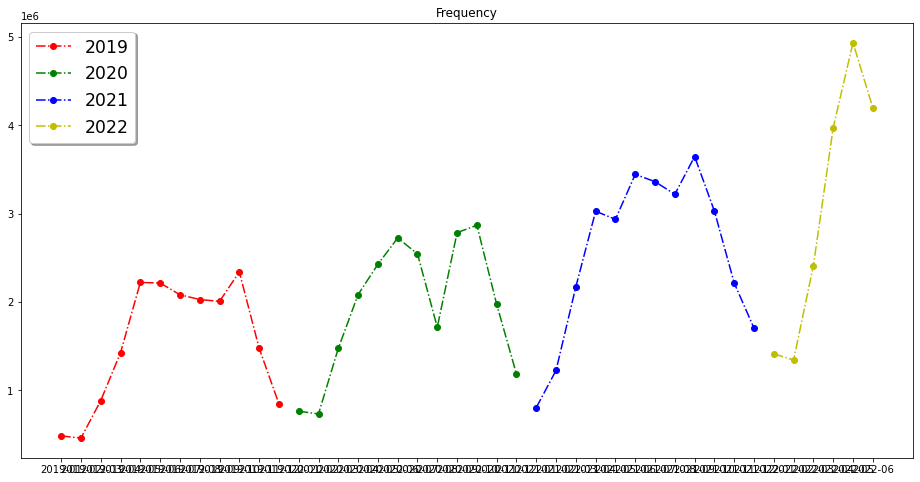

In [133]:
plt.figure(figsize = [16,8])
plt.plot(df_season.iloc[:12], 'o-.r', label = '2019')
plt.plot(df_season.iloc[12:24], 'o-.g', label = '2020')
plt.plot(df_season.iloc[24:36], 'o-.b', label = '2021')
plt.plot(df_season.iloc[36:], 'o-.y', label = '2022')
plt.title('Frequency')
plt.legend(fontsize = 'xx-large', shadow = True)
plt.show()

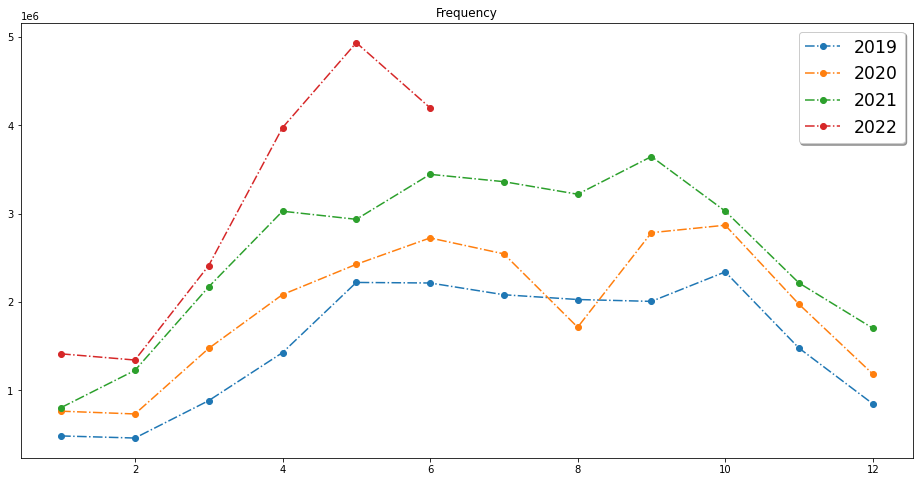

In [175]:
plt.figure(figsize = (16,8))
plt.plot(range(1,13), df_season_19, 'o-.', label = '2019')
plt.plot(range(1,13), df_season_20, 'o-.', label = '2020')
plt.plot(range(1,13), df_season_21, 'o-.', label = '2021')
plt.plot(range(1,7), df_season_22, 'o-.', label = '2022')
plt.title('Frequency')
plt.legend(fontsize = 'xx-large', shadow = True)
plt.show()

In [34]:
key = '486d7a70666c6565313039487463564a'
response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/1/1/2022091605'.format(key))
response.json()

{'getStationListHist': {'list_total_count': 1,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다.'},
  'row': [{'rackTotCnt': '10',
    'stationName': '108. 서교동 사거리',
    'parkingBikeTotCnt': '0',
    'shared': '0',
    'stationLatitude': '37.55274582',
    'stationLongitude': '126.91861725',
    'stationId': 'ST-10',
    'stationDt': '2022091605'}]}}

In [38]:
response.json()['getStationListHist']['row'][0]['parkingBikeTotCnt']

'0'

In [49]:
list1 = []
list2 = []
key = '486d7a70666c6565313039487463564a'
for dd in range(10, 11) :
    for HH in tqdm(range(24)) :
        Dt = '202209' + str(dd) + '{:0>2}'.format(HH)
        response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/1/1/{}'.format(key, Dt))
        tmp = response.json()['getStationListHist']['row'][0]['parkingBikeTotCnt']
        list1.append(Dt)
        list2.append(int(tmp))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:52<00:00,  2.18s/it]


In [50]:
print(list1)
print(list2)

['2022091000', '2022091001', '2022091002', '2022091003', '2022091004', '2022091005', '2022091006', '2022091007', '2022091008', '2022091009', '2022091010', '2022091011', '2022091012', '2022091013', '2022091014', '2022091015', '2022091016', '2022091017', '2022091018', '2022091019', '2022091020', '2022091021', '2022091022', '2022091023']
[2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 5, 2, 4, 1, 0, 10, 4, 0, 0]


In [ ]:
#월 별 따릉이 이용 횟수 추출하기
time_start = time.time()
df_season = pd.DataFrame(columns = ['대여일시'], dtype = 'int64')
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
listd = os.listdir(path)

for x in tqdm(listd) :
    if (x == '1904.csv') | (x == '1905.csv') :
        tmp = pd.read_csv(path + x, encoding = 'cp949', header = None)
    else :
        tmp = pd.read_csv(path + x, encoding = 'cp949')
    tmp_ = pd.DataFrame(tmp.iloc[:,1].str.slice(0,7).value_counts())
    df_season = pd.concat([df_season, tmp_], axis = 1)
print('소모 시간 : {:.2f}초'.format(time.time() - time_start))

In [14]:
path = 'C:\\Users\\Lee\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
listd = os.listdir(path)
listd

# for x in listd :
#     tmp = pd.read_csv(path + x, encoding = 'cp949')

['1901.csv',
 '1902.csv',
 '1903.csv',
 '1904.csv',
 '1905.csv',
 '1906a.csv',
 '1906b.csv',
 '1906c.csv',
 '1907a.csv',
 '1907b.csv',
 '1907c.csv',
 '1908a.csv',
 '1908b.csv',
 '1908c.csv',
 '1909a.csv',
 '1909b.csv',
 '1909c.csv',
 '1910a.csv',
 '1910b.csv',
 '1910c.csv',
 '1911a.csv',
 '1911b.csv',
 '1912.csv',
 '2001.csv',
 '2002.csv',
 '2003.csv',
 '2004.csv',
 '2005.csv',
 '2006.csv',
 '2007,8.csv',
 '2009.csv',
 '2010.csv',
 '2011.csv',
 '2012.csv',
 '2101.csv',
 '2102.csv',
 '2103.csv',
 '2104.csv',
 '2105.csv',
 '2106.csv',
 '2107.csv',
 '2108.csv',
 '2109.csv',
 '2110.csv',
 '2111.csv',
 '2112.csv',
 '2201.csv',
 '2202.csv',
 '2203.csv',
 '2204.csv',
 '2205.csv',
 '2206.csv',
 '서울특별시 공공자전거 이용정보(일별)_22.06.csv']

In [15]:
pd.read_csv(path + listd[-1], encoding = 'cp949')

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06-01,3,중랑센터,정기권,M,50대,1,54.69,0.43,1841.50,11
1,2022-06-01,102,102. 망원역 1번출구 앞,단체권,\N,20대,2,246.76,2.63,11329.76,132
2,2022-06-01,102,102. 망원역 1번출구 앞,일일권(비회원),\N,기타,6,689.20,6.21,26775.46,205
3,2022-06-01,102,102. 망원역 1번출구 앞,일일권,\N,20대,12,679.04,6.09,26277.80,337
4,2022-06-01,102,102. 망원역 1번출구 앞,일일권,\N,30대,3,292.92,2.61,11260.00,96
...,...,...,...,...,...,...,...,...,...,...,...
1475863,2022-06-30,5854,5854. 신한금융투자 앞,정기권,M,60대,1,37.89,0.31,1347.73,14
1475864,2022-06-30,5855,5855. 하이투자증권 앞,일일권,F,30대,1,57.78,0.66,2860.97,16
1475865,2022-06-30,5855,5855. 하이투자증권 앞,정기권,M,30대,1,19.66,0.15,636.60,3
1475866,2022-06-30,9999,상담센터,정기권,\N,40대,1,\N,\N,0.00,2


In [7]:
start_time = time.time()
df_peak = pd.DataFrame()
df_peak_1 = pd.DataFrame()
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\'
for MM in range(1, 8) :
    for DD in os.listdir(path + 'tpss_bcycl_od_statnhm_20220' + str(MM)) :
        tmp = pd.read_csv(path + 'tpss_bcycl_od_statnhm_20220' + str(MM) + '\\' + DD, encoding = 'cp949')
        try :
            tmp2 = pd.pivot_table(data = tmp, index = '시작_대여소_ID',
                                  values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜', ascending = False)
        except :
            tmp2 = pd.pivot_table(data = tmp, index = '시작_대여소',
                                  values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜', ascending = False)
        try :
            tmp3 = pd.pivot_table(data = tmp, index = '종료_대여소_ID',
                                  values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜', ascending = False)
        except :
            tmp3 = pd.pivot_table(data = tmp, index = '종료_대여소',
                                  values = '기준_날짜', aggfunc = 'count').sort_values('기준_날짜', ascending = False)

        df_peak = pd.concat([df_peak, tmp2], axis = 1)
        df_peak_1 = pd.concat([df_peak_1, tmp3], axis = 1)
print(df_peak)

print('시간 : {:.2f}초'.format(time.time() - start_time))

         기준_날짜  기준_날짜  기준_날짜  기준_날짜  기준_날짜  기준_날짜  기준_날짜  기준_날짜  기준_날짜  기준_날짜  \
ST-2031  201.0  179.0  379.0  484.0  471.0  525.0  492.0  302.0  225.0  430.0   
ST-2905  188.0  137.0  113.0  146.0  131.0  134.0  185.0  168.0  192.0  109.0   
ST-2017  168.0   79.0  165.0  157.0  165.0  195.0  206.0  159.0   92.0  174.0   
ST-99    144.0  105.0  187.0  175.0  197.0  245.0  225.0  135.0  138.0  192.0   
ST-891   143.0  182.0  254.0  244.0  281.0  301.0  359.0  251.0  249.0  321.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
ST-3108    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ST-3109    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ST-3110    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ST-3112    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ST-3111    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

         ...   기준_날짜  기준_날짜

In [32]:
df_peak = pd.DataFrame(df_peak.sum(axis = 1), dtype = 'int64')
df_peak = df_peak.rename(columns = {0 : 'Frequency'})
df_peak = df_peak.sort_values(by = 'Frequency', ascending = False)

df_peak_1 = pd.DataFrame(df_peak_1.sum(axis = 1), dtype = 'int64')
df_peak_1 = df_peak_1.rename(columns = {0 : 'Frequency'})
df_peak_1 = df_peak_1.sort_values(by = 'Frequency', ascending = False)

In [36]:
df_peak_2 = pd.concat([df_peak, df_peak_1], axis = 1).iloc[:-2, :]
df_peak_2.columns = ['대여', '반납']
df_peak_2['대여-반납'] = df_peak_2['대여'] - df_peak_2['반납']
df_peak_2 = df_peak_2.sort_values(by = '대여-반납', ascending = False)
df_peak_2

,대여,반납,대여-반납
ST-385,36461.0,21012,15449.0
ST-318,18118.0,4157,13961.0
ST-523,28917.0,17226,11691.0
ST-1672,31465.0,20581,10884.0
ST-391,28234.0,18238,9996.0
...,...,...,...
ST-1137,41845.0,52853,-11008.0
ST-492,45136.0,56366,-11230.0
ST-2264,38905.0,50175,-11270.0
ST-99,116692.0,131524,-14832.0


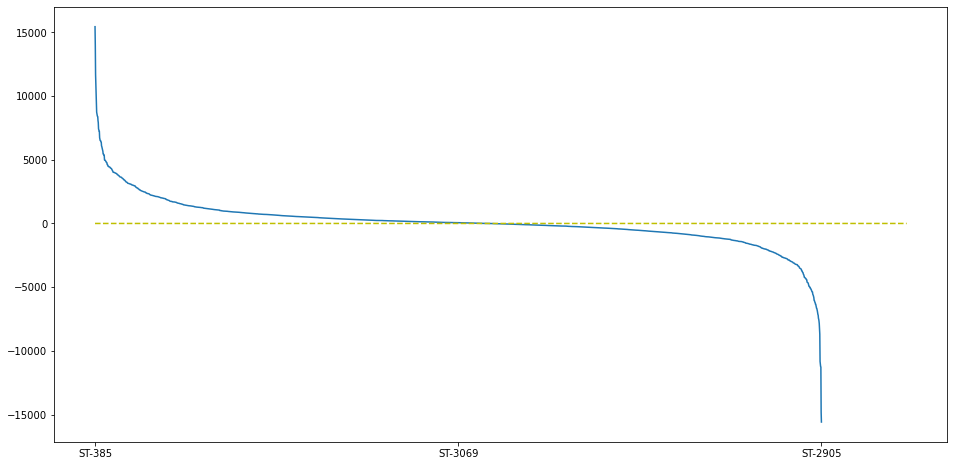

In [50]:
# 대여소별 대여 - 반납을 나타냈을 때 // 대여와 반납이 비슷한 경우가 대부분이지만, 일부분의 대여소는 현저하게 대여가 많거나 반납이 많음
plt.figure(figsize = (16,8))
plt.plot(df_peak_2['대여-반납'])
plt.plot([0]*3000, 'y--')
# plt.plot(df_peak_2['대여-반납'][df_peak_2['대여-반납'] >= df_peak_2['대여-반납'].describe().iloc[1,0] + df_peak_2['대여-반납'].describe().iloc[2,0] * 3], '-o')
# plt.plot([df_peak.describe().iloc[1,0] + df_peak.describe().iloc[2,0] * 3]*2700, '--r', label = 'mean + 3 * std')
plt.xticks([0, 1342, 2684])
# plt.legend()
plt.show()

In [44]:
df_peak_2.iloc[:,2].head(10)

ST-385     15449.0
ST-318     13961.0
ST-523     11691.0
ST-1672    10884.0
ST-391      9996.0
ST-73       9576.0
ST-2411     8739.0
ST-1694     8599.0
ST-1197     8495.0
ST-219      8403.0
Name: 대여-반납, dtype: float64

In [45]:
df_peak_2.iloc[:,2].tail(10)

ST-2033    -7662.0
ST-2771    -7863.0
ST-699     -8378.0
ST-18      -8688.0
ST-455    -10830.0
ST-1137   -11008.0
ST-492    -11230.0
ST-2264   -11270.0
ST-99     -14832.0
ST-2905   -15591.0
Name: 대여-반납, dtype: float64

In [82]:
df_peak[df_peak['Frequency'] >= df_peak.describe().iloc[1,0] + df_peak.describe().iloc[2,0] * 3]

,Frequency
ST-2031,153657
ST-73,119293
ST-99,116692
ST-2905,115457
ST-702,111610
ST-891,111398
ST-1718,97268
ST-1546,94340
ST-1065,93055
ST-668,91745


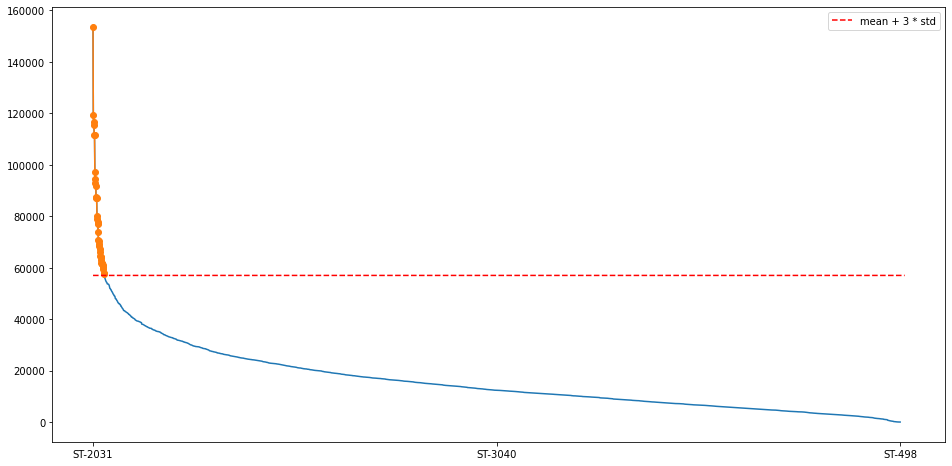

In [129]:
plt.figure(figsize = (16,8))
plt.plot(df_peak)
plt.plot(df_peak[df_peak['Frequency'] >= df_peak.describe().iloc[1,0] + df_peak.describe().iloc[2,0] * 3], '-o')
plt.plot([df_peak.describe().iloc[1,0] + df_peak.describe().iloc[2,0] * 3]*2700, '--r', label = 'mean + 3 * std')
plt.xticks([0, 1342, 2684])
plt.legend()
plt.show()

In [134]:
aaa = pd.DataFrame()
for x in df_peak.head(13).index :
    aaa = pd.concat([aaa, df1[df1['대여소_ID'] == x]])
aaa

,대여소_ID,주소1,주소2,위도,경도,자치구
1983,ST-2031,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),NaN,37.566925,126.827438,강서구
297,ST-73,서울특별시 영등포구 여의동로 지하343,여의나루역 1번출구 앞,37.527157,126.931900,영등포구
10,ST-99,서울특별시 광진구 능동로 10,뚝섬유원지역 1번출구 앞,37.531860,127.067192,광진구
1014,ST-2905,서울특별시 마포구 망원로 1-1 토목과 자재창고,NaN,37.555576,126.896889,마포구
327,ST-702,서울특별시 관악구 신림동 1467-13,NaN,37.484085,126.926888,관악구
119,ST-891,서울특별시 송파구 올림픽로 293-19,송파구 신천동 28,37.513126,127.100960,송파구
2332,ST-1718,서울특별시 강서구 마곡중앙5로 지하 2,NaN,37.565201,126.827316,강서구
2522,ST-1546,서울특별시 관악구 난곡로 367,신대방역 2번 출구,37.487129,126.913017,관악구
3050,ST-1065,서울특별시 강서구 마곡동 797-5,NaN,37.558949,126.837173,강서구
366,ST-668,서울특별시 구로구 시흥대로 577-2,구로구 구로동 1119,37.484940,126.901321,구로구


In [149]:
df_peak.sort_values('Frequency').head(30).sort_index().iloc[[0,1,2,3,4,5,6,7,8,9,10,12,24,25,26,27,28,29], :].sort_values('Frequency')

,Frequency
ST-498,6
ST-2695,8
ST-1750,8
ST-2863,10
ST-1354,14
ST-34,16
ST-484,16
ST-598,16
ST-301,50
ST-2429,56


In [150]:
bbb = pd.DataFrame()
for x in df_peak.sort_values('Frequency').head(30).sort_index().iloc[[0,1,2,3,4,5,6,7,8,9,10,12,24,25,26,27,28,29], :].sort_values('Frequency').index :
    bbb = pd.concat([bbb, df1[df1['대여소_ID'] == x]])

In [151]:
bbb

,대여소_ID,주소1,주소2,위도,경도,자치구
555,ST-498,서울특별시 강동구 구천면로 395 명일동공영주차장,NaN,37.550800,127.142952,강동구
1248,ST-2695,서울특별시 도봉구 도봉로 955,NaN,37.689762,127.044891,도봉구
2296,ST-1750,서울특별시 강서구 개화동로8길 17,개화정비,37.577908,126.798042,강서구
1061,ST-2863,서울특별시 성동구 테스트 대여소,NaN,37.571640,127.035660,성동구
2734,ST-1354,서울특별시 영등포구 여의대방로 300,대방역 4번출구,37.512901,126.926613,영등포구
728,ST-34,서울특별시 서대문구 연세로5나길 19,53-47,37.556889,126.935104,서대문구
569,ST-484,서울특별시 서초구 방배로 110,위트콤,37.484215,126.996292,서초구
444,ST-598,서울특별시 서초구 방배로 110,석교빌딩 4층,37.484215,126.996292,서초구
897,ST-301,서울특별시 영등포구 신길동3596,남서울아파트 14동앞,37.500649,126.909515,영등포구
1543,ST-2429,서울특별시 영등포구 영등포로34길 9,NaN,37.519440,126.902573,영등포구


In [154]:
aaa.to_csv('C:\\활성화정류소.csv', encoding = 'cp949')
bbb.to_csv('C:\\비활성화정류소.csv', encoding = 'cp949')

In [155]:
aaa

,대여소_ID,주소1,주소2,위도,경도,자치구
1983,ST-2031,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),NaN,37.566925,126.827438,강서구
297,ST-73,서울특별시 영등포구 여의동로 지하343,여의나루역 1번출구 앞,37.527157,126.931900,영등포구
10,ST-99,서울특별시 광진구 능동로 10,뚝섬유원지역 1번출구 앞,37.531860,127.067192,광진구
1014,ST-2905,서울특별시 마포구 망원로 1-1 토목과 자재창고,NaN,37.555576,126.896889,마포구
327,ST-702,서울특별시 관악구 신림동 1467-13,NaN,37.484085,126.926888,관악구
119,ST-891,서울특별시 송파구 올림픽로 293-19,송파구 신천동 28,37.513126,127.100960,송파구
2332,ST-1718,서울특별시 강서구 마곡중앙5로 지하 2,NaN,37.565201,126.827316,강서구
2522,ST-1546,서울특별시 관악구 난곡로 367,신대방역 2번 출구,37.487129,126.913017,관악구
3050,ST-1065,서울특별시 강서구 마곡동 797-5,NaN,37.558949,126.837173,강서구
366,ST-668,서울특별시 구로구 시흥대로 577-2,구로구 구로동 1119,37.484940,126.901321,구로구


In [239]:
list_yyyymmddhh = []
for D in range(0,6) :
    for HH in range(0, 24) :
        list_yyyymmddhh.append(str(2022091) + str(D) + '{:0>2}'.format(HH))
print(len(list_yyyymmddhh), list_yyyymmddhh)

144 ['2022091000', '2022091001', '2022091002', '2022091003', '2022091004', '2022091005', '2022091006', '2022091007', '2022091008', '2022091009', '2022091010', '2022091011', '2022091012', '2022091013', '2022091014', '2022091015', '2022091016', '2022091017', '2022091018', '2022091019', '2022091020', '2022091021', '2022091022', '2022091023', '2022091100', '2022091101', '2022091102', '2022091103', '2022091104', '2022091105', '2022091106', '2022091107', '2022091108', '2022091109', '2022091110', '2022091111', '2022091112', '2022091113', '2022091114', '2022091115', '2022091116', '2022091117', '2022091118', '2022091119', '2022091120', '2022091121', '2022091122', '2022091123', '2022091200', '2022091201', '2022091202', '2022091203', '2022091204', '2022091205', '2022091206', '2022091207', '2022091208', '2022091209', '2022091210', '2022091211', '2022091212', '2022091213', '2022091214', '2022091215', '2022091216', '2022091217', '2022091218', '2022091219', '2022091220', '2022091221', '2022091222', '

In [200]:
response.json()['getStationListHist']['row'][0]

{'rackTotCnt': '10',
 'stationName': '108. 서교동 사거리',
 'parkingBikeTotCnt': '2',
 'shared': '20',
 'stationLatitude': '37.55274582',
 'stationLongitude': '126.91861725',
 'stationId': 'ST-10',
 'stationDt': '2022091000'}

In [286]:
aaa_park = pd.DataFrame()
for YYYY in tqdm(list_yyyymmddhh) :
    tmp5 = pd.DataFrame()
    key = '486d7a70666c6565313039487463564a'
    for x in range(1, 10) :
        response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, YYYY))
        try :
            for idx in range(response.json()['getStationListHist']['list_total_count']) :
                tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
                if tmp1 in list(aaa['대여소_ID'].values) :
                    tmp2 = int(response.json()['getStationListHist']['row'][idx]['parkingBikeTotCnt'])
                    tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                    tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                    tmp5 = pd.concat([tmp5, tmp4])
                else :
                    pass
        except :
            pass
    aaa_park = pd.concat([aaa_park, tmp5.iloc[:13,:]], axis = 1)

100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [41:42<00:00, 17.38s/it]


In [287]:
aaa_park

,2022091000,2022091001,2022091002,2022091003,2022091004,2022091005,2022091006,2022091007,2022091008,2022091009,...,2022091514,2022091515,2022091516,2022091517,2022091518,2022091519,2022091520,2022091521,2022091522,2022091523
ST-1065,1,0,2,0,3,0,1,2,2,4,...,39,45,45,45,70,66,56,24,3,0
ST-1546,6,7,8,8,9,8,8,10,8,7,...,13,9,6,10,8,1,3,7,7,3
ST-1718,24,11,9,5,4,5,4,9,13,16,...,23,22,12,14,16,16,0,0,0,0
ST-1996,1,0,3,2,0,0,0,3,6,5,...,39,35,34,13,6,2,7,2,3,1
ST-2031,0,0,1,1,1,1,2,1,7,8,...,48,50,42,34,48,1,4,1,1,0
ST-2045,38,26,27,25,26,25,26,22,21,21,...,40,41,48,65,89,95,22,9,0,0
ST-2905,73,67,61,62,54,52,52,53,53,57,...,16,16,10,12,14,30,44,64,50,51
ST-295,15,10,10,11,11,9,7,10,11,10,...,19,3,3,1,6,1,2,8,0,0
ST-668,11,5,1,0,1,3,6,6,7,5,...,53,50,56,56,35,2,8,1,8,0
ST-702,77,91,86,86,86,81,77,76,72,76,...,28,30,15,15,16,28,10,2,13,9


In [289]:
bbb_park = pd.DataFrame()
for YYYY in tqdm(list_yyyymmddhh) :
    tmp5 = pd.DataFrame()
    key = '486d7a70666c6565313039487463564a'
    for x in range(1, 10) :
        response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, YYYY))
        try :
            for idx in range(response.json()['getStationListHist']['list_total_count']) :
                tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
                if tmp1 in list(bbb['대여소_ID'].values) :
                    tmp2 = int(response.json()['getStationListHist']['row'][idx]['parkingBikeTotCnt'])
                    tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                    tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                    tmp5 = pd.concat([tmp5, tmp4])
                else :
                    pass
        except :
            pass
    bbb_park = pd.concat([bbb_park, tmp5.iloc[:13,:]], axis = 1)

100%|████████████████████████████████████████████████████████████████████████████████| 144/144 [38:41<00:00, 16.12s/it]


In [292]:
aaa_park.to_csv('C:\\high.csv')

In [293]:
bbb_park.to_csv('C:\\low.csv')

9.21 면담
각 자치구 별 상위 3개 특징
대여 / 반납 둘 다 해보기
대여 상위 몇 개 반납 정류소 특징
반납 상위 몇 개 대여 정류소 특징

In [98]:
# ST-2031 
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\'
result = pd.DataFrame()
for M in tqdm(range(1, 8)) :
    list_ = os.listdir(path + 'tpss_bcycl_od_statnhm_20220{}'.format(M))
    for file in list_ :
        tmp = pd.read_csv(path + 'tpss_bcycl_od_statnhm_20220{}\\'.format(M) + file, encoding = 'cp949')
        tmp_ = tmp[tmp.iloc[:, 2] == 'ST-2031']
        tmp__ = pd.DataFrame(pd.pivot_table(tmp_, values = '기준_날짜', index = tmp_.columns[3], aggfunc = 'count'))
        result = pd.concat([result, tmp__], axis = 1)
result_ = result.sum(axis = 1).sort_values(ascending = False)
result_ = pd.DataFrame(result_, dtype = 'int64')
result_.index.name = '반납(대여소)'
result_ = result_.rename(columns = {0 : '횟수'})
result_

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:49<00:00,  7.13s/it]


,횟수
반납(대여소),
ST-2031,8900
ST-1709,6234
ST-2033,4724
ST-514,3861
ST-2036,3815
...,...
ST-1498,2
ST-748,2
ST-16,2


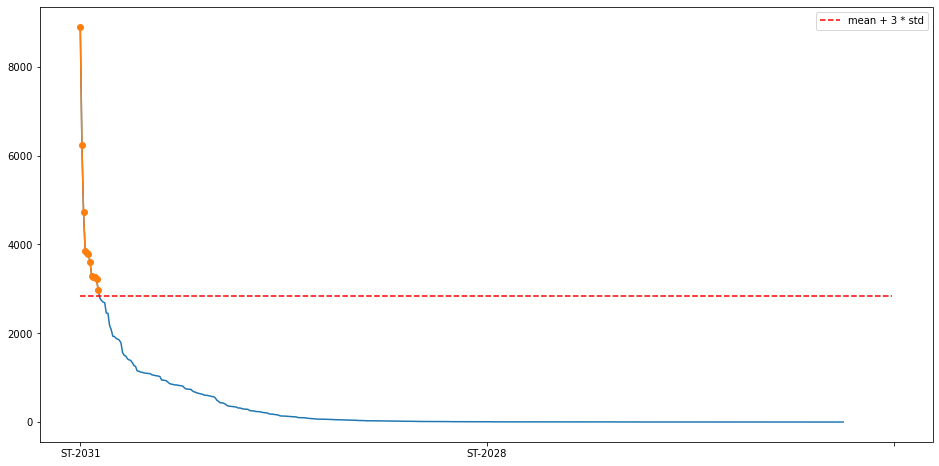

In [99]:
plt.figure(figsize = (16,8))
plt.plot(result_)
plt.plot(result_[result_['횟수'] >= result_.describe().iloc[1,0] + result_.describe().iloc[2,0] * 3], '-o')
plt.plot([result_.describe().iloc[1,0] + result_.describe().iloc[2,0] * 3]*500, '--r', label = 'mean + 3 * std')
plt.xticks([0, 250, 500])
plt.legend()
plt.show()

In [117]:
A = pd.DataFrame()
for x in result_[result_['횟수'] >= result_.describe().iloc[1,0] + result_.describe().iloc[2,0] * 3].index :
    A = pd.concat([A, df1[df1.iloc[:, 0] == x]])
A = pd.concat([A.reset_index(drop = True), result_[result_['횟수'] >= result_.describe().iloc[1,0] + result_.describe().iloc[2,0] * 3].reset_index(drop = True)], axis = 1)
A

,대여소_ID,주소1,주소2,위도,경도,자치구,횟수
0,ST-2031,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),NaN,37.566925,126.827438,강서구,8900
1,ST-1709,서울특별시 강서구 공항대로 지하 163,마곡역 교차로(2번출구),37.560501,126.826653,강서구,6234
2,ST-2033,서울특별시 강서구 마곡중앙8로 71 엘지사이언스파크,NaN,37.561337,126.833900,강서구,4724
3,ST-514,서울특별시 강서구 마곡동 221-4,NaN,37.573124,126.822388,강서구,3861
4,ST-2036,서울특별시 강서구 공항대로 195 힐스테이트에코동익,NaN,37.559658,126.829605,강서구,3815
5,ST-1689,서울특별시 강서구 마곡중앙로 76,힐스테이트에코마곡역,37.560242,126.827164,강서구,3787
6,ST-975,서울특별시 강서구 마곡서1로 111-12,신방화역환승주차장,37.567284,126.818275,강서구,3604
7,ST-2035,서울특별시 강서구 마곡중앙8로 32 스페이스K 서울,NaN,37.561211,126.830345,강서구,3290
8,ST-2044,서울특별시 강서구 마곡동 770-7,NaN,37.564087,126.830849,강서구,3274
9,ST-1712,서울특별시 강서구 마곡동로 110,코오롱글로벌㈜,37.564129,126.834312,강서구,3264


In [182]:
AA = pd.concat([df1.set_index('대여소_ID'), result_], axis = 1).iloc[:-1,:]
AA[AA.iloc[:,-1] > -1].to_csv('C:\\df.csv', encoding = 'cp949')

In [194]:
B = pd.concat([df1.set_index('대여소_ID'), df_peak], axis = 1)
B[B.iloc[:,-1] > 0].iloc[:-1,:].to_csv('C:\\a.csv', encoding = 'cp949')

In [68]:
dd = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\QGIS\\횟수 포함 대여소.csv', encoding = 'cp949')
ee = dd.rename(columns = {'Unnamed: 0' : '대여소_ID'})
ee = ee.set_index('대여소_ID')
ff = ee.sort_values('Frequency', ascending = False).head(12).index
list(ff)

['ST-2031',
 'ST-73',
 'ST-99',
 'ST-2905',
 'ST-702',
 'ST-891',
 'ST-1718',
 'ST-1546',
 'ST-1065',
 'ST-668',
 'ST-295',
 'ST-2045']

In [94]:
ff.sort()
ff.append('adsad')

['ST-1065',
 'ST-1546',
 'ST-1718',
 'ST-1996',
 'ST-2031',
 'ST-2045',
 'ST-2905',
 'ST-295',
 'ST-668',
 'ST-702',
 'ST-73',
 'ST-891',
 'ST-99']

In [120]:
# 대여소 용량 구하기
ff = pd.read_csv('C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\2주차까지\\활성화정류소.csv', encoding = 'cp949')
ff = list(ff['대여소_ID'])
print(ff)
key = '486d7a70666c6565313039487463564a'
tmp5 = pd.DataFrame()
for x in range(1, 10) :
    response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, 2022092700))
    try :
        for idx in range(response.json()['getStationListHist']['list_total_count']) :
            tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
            if tmp1 in list(ff) :
                tmp2 = int(response.json()['getStationListHist']['row'][idx]['rackTotCnt'])
                tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                tmp5 = pd.concat([tmp5, tmp4])
            else :
                pass
    except :
        pass
aaa_tot = pd.concat([aaa_tot, pd.DataFrame([33], index = ['ST-99'], columns = [2022092700])])
aaa_tot

['ST-2031', 'ST-73', 'ST-99', 'ST-2905', 'ST-702', 'ST-891', 'ST-1718', 'ST-1546', 'ST-1065', 'ST-668', 'ST-295', 'ST-2045', 'ST-1996']


,2022092700
ST-1065,17
ST-1546,19
ST-1718,26
ST-1996,15
ST-2031,25
ST-2045,35
ST-2905,20
ST-295,15
ST-668,18
ST-702,13


In [15]:
list_yyyymmddhh = []
for D in range(1,8) :
    for HH in range(0, 24) :
        list_yyyymmddhh.append(str(2022092) + str(D) + '{:0>2}'.format(HH))
print(len(list_yyyymmddhh), list_yyyymmddhh)

aaa_park = pd.DataFrame()
for YYYY in tqdm(list_yyyymmddhh) :
    tmp5 = pd.DataFrame()
    key = '486d7a70666c6565313039487463564a'
    for x in range(1, 10) :
        response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, YYYY))
        try :
            for idx in range(response.json()['getStationListHist']['list_total_count']) :
                tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
                if tmp1 in list(ff) :
                    tmp2 = int(response.json()['getStationListHist']['row'][idx]['parkingBikeTotCnt'])
                    tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                    tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                    tmp5 = pd.concat([tmp5, tmp4])
                else :
                    pass
        except :
            pass
    aaa_park = pd.concat([aaa_park, tmp5.iloc[:13,:]], axis = 1)

168 ['2022092100', '2022092101', '2022092102', '2022092103', '2022092104', '2022092105', '2022092106', '2022092107', '2022092108', '2022092109', '2022092110', '2022092111', '2022092112', '2022092113', '2022092114', '2022092115', '2022092116', '2022092117', '2022092118', '2022092119', '2022092120', '2022092121', '2022092122', '2022092123', '2022092200', '2022092201', '2022092202', '2022092203', '2022092204', '2022092205', '2022092206', '2022092207', '2022092208', '2022092209', '2022092210', '2022092211', '2022092212', '2022092213', '2022092214', '2022092215', '2022092216', '2022092217', '2022092218', '2022092219', '2022092220', '2022092221', '2022092222', '2022092223', '2022092300', '2022092301', '2022092302', '2022092303', '2022092304', '2022092305', '2022092306', '2022092307', '2022092308', '2022092309', '2022092310', '2022092311', '2022092312', '2022092313', '2022092314', '2022092315', '2022092316', '2022092317', '2022092318', '2022092319', '2022092320', '2022092321', '2022092322', '

100%|██████████████████████████████████████████████████████████████████████████████| 168/168 [1:13:39<00:00, 26.31s/it]


In [2]:
aaa_park = pd.read_csv('C:\\aa.csv', encoding = 'cp949')
aaa_park = aaa_park.rename(columns = {'Unnamed: 0' : 'Stataion'})
aaa_park = aaa_park.set_index(aaa_park.iloc[:,0]).iloc[:,1:]
aaa_park

,2022092101,2022092102,2022092103,2022092104,2022092105,2022092106,2022092107,2022092108,2022092109,2022092110,...,2022092714,2022092715,2022092716,2022092717,2022092718,2022092719,2022092720,2022092721,2022092722,2022092723
Stataion,,,,,,,,,,,,,,,,,,,,,
ST-1065,0,0,2,0,1,2,1,3,2,1,...,21,21,15,22,39,47,49,26,0,0
ST-1546,3,0,3,5,5,6,7,23,49,26,...,23,25,11,7,5,16,2,7,5,2
ST-1718,0,0,0,1,1,6,24,82,1,6,...,29,25,20,29,40,31,6,3,3,0
ST-2031,1,1,0,0,1,3,12,52,35,40,...,45,37,41,37,47,15,3,18,0,0
ST-2905,37,35,36,37,37,34,31,26,23,20,...,10,8,12,15,26,43,41,32,7,18
ST-668,1,4,1,1,2,3,3,10,14,18,...,49,46,40,35,25,5,4,1,5,4
ST-702,6,1,0,0,1,4,10,12,9,17,...,42,46,43,37,43,52,73,63,46,39
ST-73,0,0,1,3,4,4,7,3,2,18,...,14,13,3,2,1,1,4,2,3,7
ST-891,0,0,1,0,1,3,13,28,34,55,...,71,74,72,68,38,7,1,0,0,2


In [64]:
aaa_park.index[0]

'ST-1065'

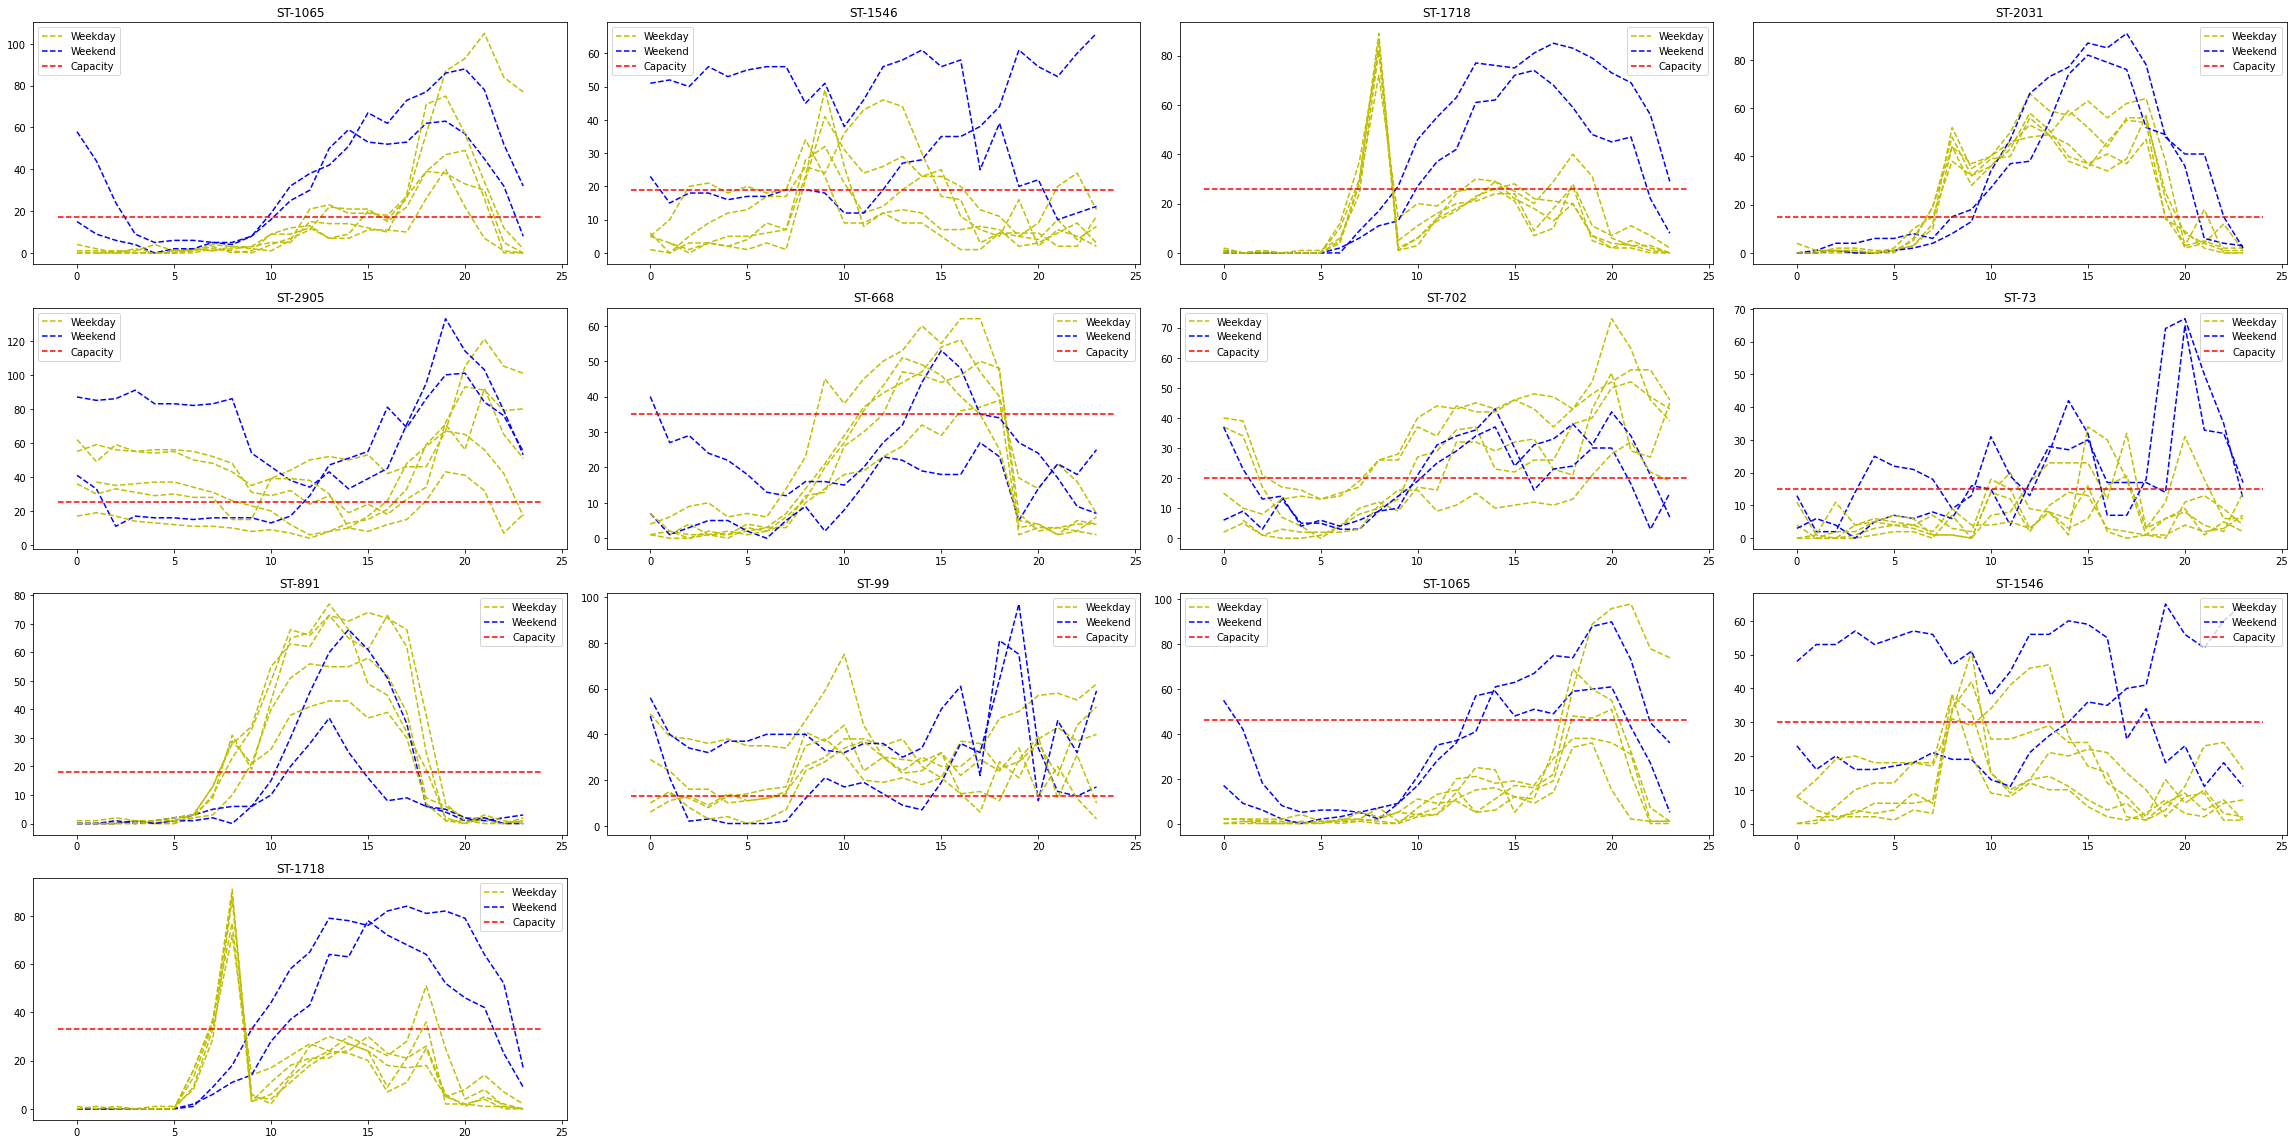

In [144]:
.#많이 사용하는 대여소 평일 / 주말 대여소에 있는 따릉이 개수 그래프 산출 // 폴더에 aaa.png로 저장 됨
plt.figure(figsize = (32, 16))
for idx, st in enumerate(aaa_park.index) :
    plt.subplot(4, 4, idx +1)
    plt.title('{}'.format(aaa_park.index[idx]))
    for x in range(7):
        if x == 0 :
            plt.plot(range(1, 24), aaa_park.iloc[idx, :23], 'y--', label = 'Weekday')
        elif (x == 3) :
            plt.plot(range(0, 24), aaa_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'b--', label = 'Weekend')
        elif (x == 4) :
            plt.plot(range(0, 24), aaa_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'b--')
        else :
            plt.plot(range(0, 24), aaa_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'y--')
    plt.plot(range(-1, 25), [aaa_tot.iloc[idx,0]]*26, '--r', label = 'Capacity')
    plt.legend()
plt.tight_layout()
plt.savefig('aaa.png', facecolor='#eeeeee', dpi = 1000)
plt.show()

 44%|████████████████████████████████████▎                                             | 23/52 [01:55<02:19,  4.81s/it]C:\Users\Lee\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [09:26<00:00, 10.89s/it]


566.9841985702515 초


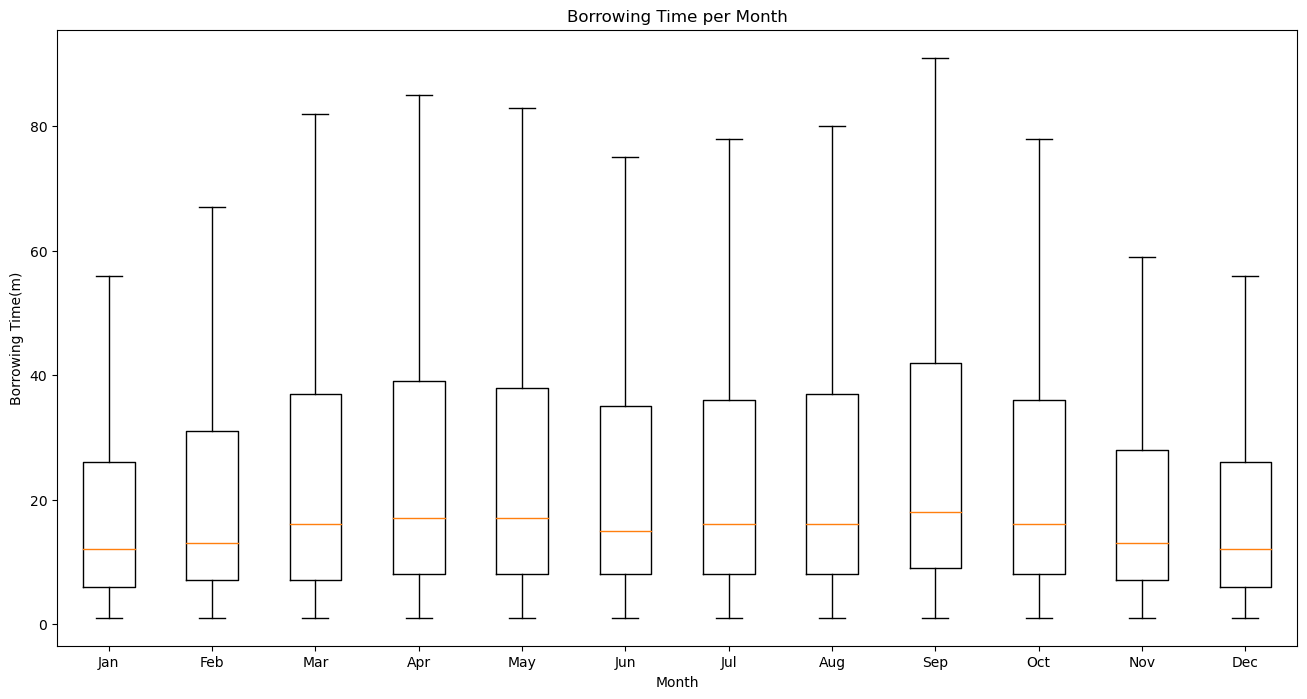

In [3]:
# 월별 이용 시간
start_time = time.time()
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
list_file = os.listdir(path)
DB = {}
MM = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for x in MM :
    DB[x] = []

def cla_mon(x) :
    x = x.split(' ')[0]
    x = x[5:7]
    return int(x)

for csv in tqdm(list_file) :
    try :
        _ = pd.read_csv(path + csv, encoding = 'cp949') # DB 파일
        __ = _.iloc[:,1].apply(cla_mon) # mon 써있는 series(기준)
        ___ = set(__) # set
        ____ = _.iloc[:, -2]
        for mon in range(1, 13) :
            if mon in ___ :
                DB[MM[mon-1]] += list(_[(__ == mon) & (____ > 0)].iloc[:,-2])
            else :
                pass
    except :
        print(csv)
_ = ''
__ = ''
___ = ''
print(time.time() - start_time, '초')

plt.rcParams['figure.figsize'] = (16, 8)
fig, ax = plt.subplots()
ax.boxplot([DB[mon] for mon in MM], showfliers=False)
plt.xticks(range(1, 13), MM)
# ax.set_ylim(-5, 100)
plt.title('Borrowing Time per Month')
plt.xlabel('Month')
plt.ylabel('Borrowing Time(m)')
plt.savefig('Borrowing Time per Month.png', dpi = 200)
plt.show()

 44%|████████████████████████████████████▎                                             | 23/52 [01:54<02:25,  5.03s/it]C:\Users\Lee\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [09:22<00:00, 10.81s/it]


563.2180948257446 초


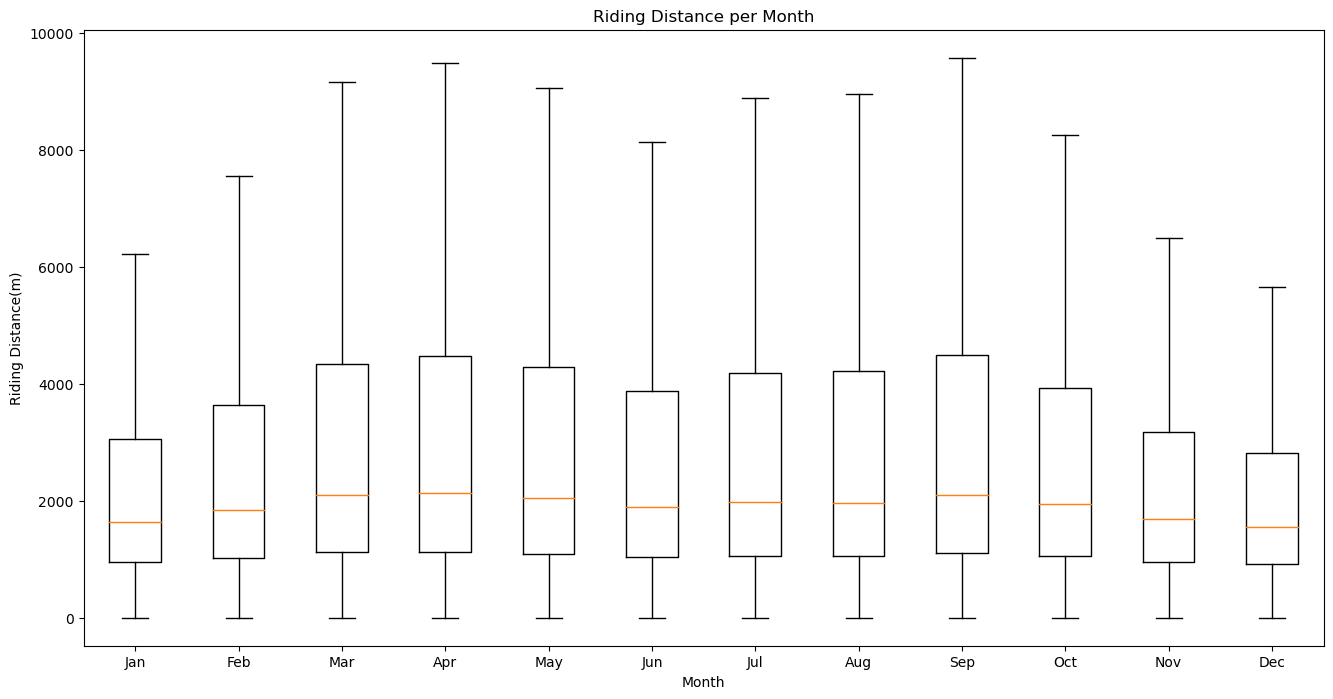

In [4]:
# 월별 이용 거리
start_time = time.time()
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
list_file = os.listdir(path)
DB = {}
MM = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for x in MM :
    DB[x] = []

def cla_mon(x) :
    x = x.split(' ')[0]
    x = x[5:7]
    return int(x)

for csv in tqdm(list_file) :
    try :
        _ = pd.read_csv(path + csv, encoding = 'cp949') # DB 파일
        __ = _.iloc[:,1].apply(cla_mon) # mon 써있는 series(기준)
        ___ = set(__) # set
        ____ = _.iloc[:, -1]
        for mon in range(1, 13) :
            if mon in ___ :
                DB[MM[mon-1]] += list(_[(__ == mon) & (____ > 0)].iloc[:,-1])
            else :
                pass
    except :
        print(csv)
_ = ''
__ = ''
___ = ''
print(time.time() - start_time, '초')

plt.rcParams['figure.figsize'] = (16, 8)
fig, ax = plt.subplots()
ax.boxplot([DB[mon] for mon in MM], showfliers=False)
plt.xticks(range(1, 13), MM)
# ax.set_ylim(-5, 100)
plt.title('Riding Distance per Month')
plt.xlabel('Month')
plt.ylabel('Riding Distance(m)')
plt.savefig('Riding Distance per Month.png', dpi = 200)
plt.show()

 44%|████████████████████████████████████▎                                             | 23/52 [01:23<01:44,  3.61s/it]C:\Users\Lee\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [07:05<00:00,  8.19s/it]


426.87704253196716 초


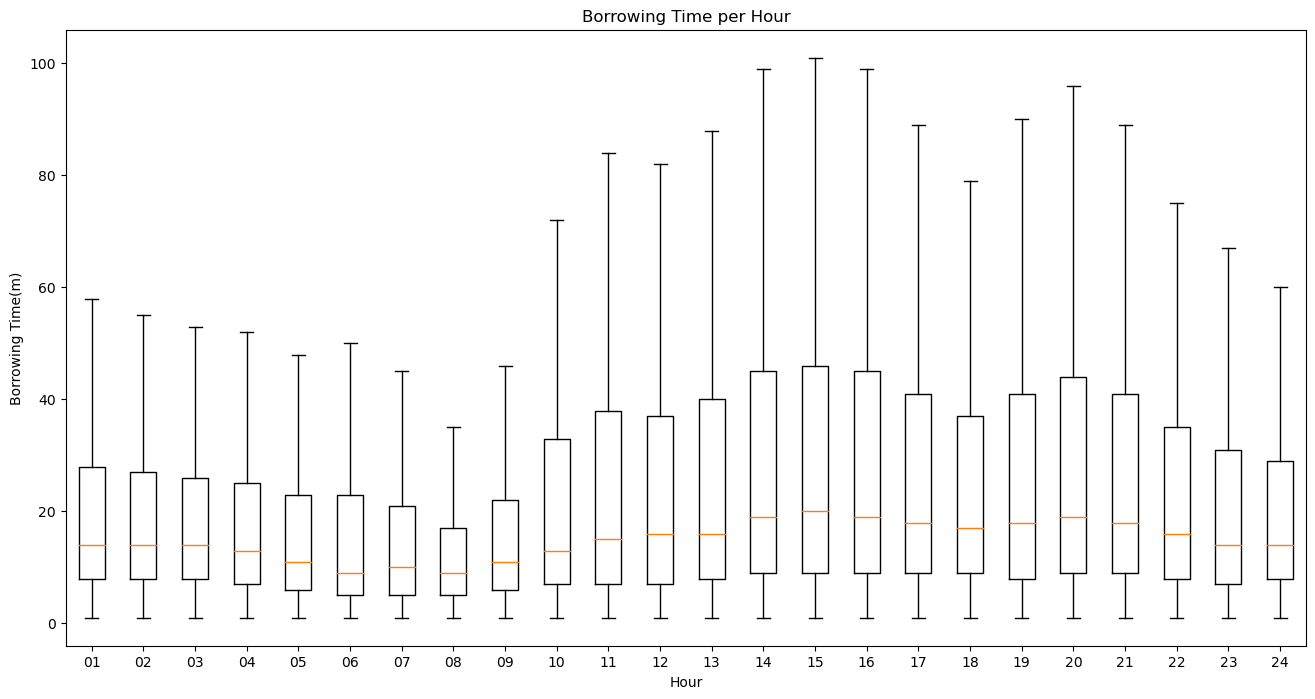

In [173]:
# 시간별 이용 시간
start_time = time.time()
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
list_file = os.listdir(path)
DB = {}
HH = ['{0:0>2}'.format(x) for x in range(1, 25)]
for x in HH :
    DB[x] = []

def cla_hour(x) :
    x = x.split(' ')[1]
    x = x[:2]
    return int(x)

for csv in tqdm(list_file) :
    try :
        _ = pd.read_csv(path + csv, encoding = 'cp949') # DB 파일
        __ = _.iloc[:,1].apply(cla_hour) # hour(int) 써있는 series(기준)
        ___ = set(__) # set
        ____ = _.iloc[:, -2]
        for hour in ___ :
            if hour in ___ :
                DB[HH[hour-1]] += list(_[(__ == hour) & (____ > 0)].iloc[:,-2])
            else :
                pass
    except :
        print(csv)
_ = ''
__ = ''
___ = ''
print(time.time() - start_time, '초')

plt.rcParams['figure.figsize'] = (16, 8)
fig, ax = plt.subplots()
ax.boxplot([DB[hour] for hour in HH], showfliers=False)
plt.xticks(range(1, 25), HH)
# ax.set_ylim(-5, 100)
plt.title('Borrowing Time per Hour')
plt.xlabel('Hour')
plt.ylabel('Borrowing Time(m)')
plt.savefig('Borrowing Time per Hour.png', dpi = 200)
plt.show()

 44%|████████████████████████████████████▎                                             | 23/52 [01:28<01:36,  3.32s/it]C:\Users\Lee\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [06:35<00:00,  7.60s/it]


396.0627794265747 초


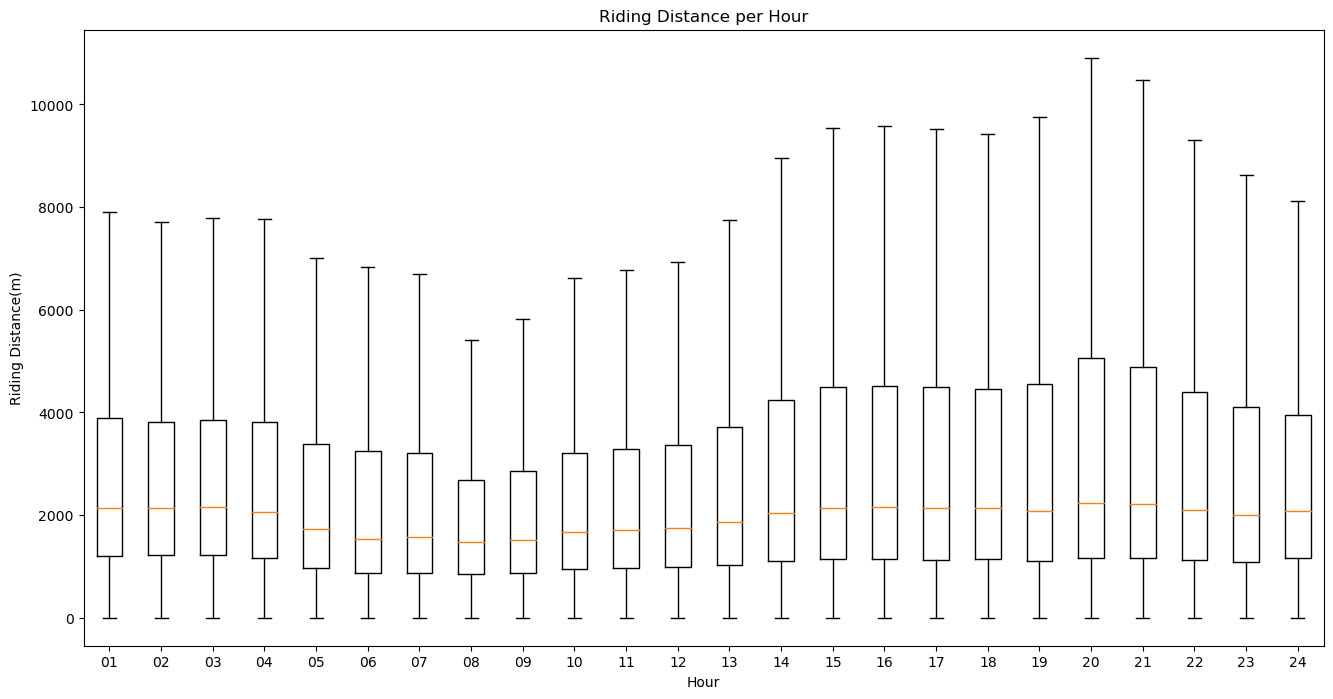

In [174]:
# 시간별 이용 거리
start_time = time.time()
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\따릉이이용전체자료\\'
list_file = os.listdir(path)
DB = {}
HH = ['{0:0>2}'.format(x) for x in range(1, 25)]
for x in HH :
    DB[x] = []

def cla_hour(x) :
    x = x.split(' ')[1]
    x = x[:2]
    return int(x)

for csv in tqdm(list_file) :
    try :
        _ = pd.read_csv(path + csv, encoding = 'cp949') # DB 파일
        __ = _.iloc[:,1].apply(cla_hour) # hour(int) 써있는 series(기준)
        ___ = set(__) # set
        ____ = _.iloc[:, -1]
        for hour in ___ :
            if hour in ___ :
                DB[HH[hour-1]] += list(_[(__ == hour) & (____ > s0)].iloc[:,-1])
            else :
                pass
    except :
        print(csv)
_ = ''
__ = ''
___ = ''
print(time.time() - start_time, '초')

plt.rcParams['figure.figsize'] = (16, 8)
fig, ax = plt.subplots()
ax.boxplot([DB[hour] for hour in HH], showfliers=False)
plt.xticks(range(1, 25), HH)
# ax.set_ylim(-5, 100)
plt.title('Riding Distance per Hour')
plt.xlabel('Hour')
plt.ylabel('Riding Distance(m)')
plt.savefig('Riding Distance per Hour.png', dpi = 200)
plt.show()

In [6]:
start_time = time.time()
path = 'C:\\Users\\Lee\\Desktop\\이병관\\2022-2\\도시공학종합설계\\'
start = pd.DataFrame()
end = pd.DataFrame()

for mm in tqdm(range(1, 8)) :
    _list = os.listdir(path + 'tpss_bcycl_od_statnhm_2022{0:0>2}\\'.format(mm))
    for file_name in _list :
        df1 = pd.read_csv(path + 'tpss_bcycl_od_statnhm_2022{0:0>2}\\'.format(mm) + file_name, 
                   encoding = 'cp949')

        pi1 = pd.pivot_table(data = df1, index = df1.columns[2], values = df1.columns[0], aggfunc = 'count')
        pi2 = pd.pivot_table(data = df1, index = df1.columns[3], values = df1.columns[0], aggfunc = 'count')
        
        pi1.columns.values[0] = '{0:0>2}{1}'.format(mm, file_name[-6 : -4])
        pi1.index.names = ['대여']
        pi2.columns.values[0] = '{0:0>2}{1}'.format(mm, file_name[-6 : -4])
        pi2.index.names = ['반납']
        
        start = pd.concat([start, pi1], axis = 1)
        end = pd.concat([end, pi2], axis = 1)

start['sum'] = start.sum(axis = 1)
end['sum'] = end.sum(axis = 1)
start = start.sort_values(by = 'sum', ascending = False)
end = end.sort_values(by = 'sum', ascending = False)
print(time.time() - start_time, '초')

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:57<00:00,  8.24s/it]

57.795965909957886 초


In [81]:
start.sort_values(by = 'sum').head(30)

,0101,0102,0103,0104,0105,0106,0107,0108,0109,0110,...,0723,0724,0725,0726,0727,0728,0729,0730,0731,sum
대여,,,,,,,,,,,,,,,,,,,,,
ST-498,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
ST-1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
ST-2695,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
ST-2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
ST-1354,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
ST-598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
ST-3112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,16.0
ST-484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
ST-34,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0


In [7]:
start.to_csv('start.csv', encoding = 'cp949')
end.to_csv('end.csv', encoding = 'cp949')

In [8]:
end.index[:6]

Index(['CENTER', 'ST-2031', 'ST-99', 'ST-2905', 'ST-702', 'ST-891'], dtype='object', name='반납')

In [9]:
start_sum = pd.DataFrame(start.iloc[:,-1])
start_sum.columns.values[0] = '대여'
start_sum.index.names = ['대여소']
start_sum

,대여
대여소,
ST-2031,153657.0
ST-73,119293.0
ST-99,116692.0
ST-2905,115457.0
ST-702,111610.0
...,...
ST-1354,14.0
ST-2863,10.0
ST-2695,8.0


In [10]:
end_sum = pd.DataFrame(end.iloc[1:,-1])
end_sum.columns.values[0] = '반납'
end_sum.index.names = ['대여소']
end_sum

,반납
대여소,
ST-2031,154724.0
ST-99,131524.0
ST-2905,131048.0
ST-702,114328.0
ST-891,113551.0
...,...
ST-2429,10.0
ST-2863,8.0
ST-2695,8.0


In [11]:
uneq = pd.concat([start_sum, end_sum], axis = 1)
uneq = uneq.fillna(0)
uneq['대여-반납'] = uneq.iloc[:, 0] - uneq.iloc[:, 1]
uneq = uneq.sort_values(by = '대여-반납', ascending = False)

In [28]:
uneq.head()

,대여,반납,대여-반납
대여소,,,
ST-385,36461.0,21012.0,15449.0
ST-318,18118.0,4157.0,13961.0
ST-523,28917.0,17226.0,11691.0
ST-1672,31465.0,20581.0,10884.0
ST-391,28234.0,18238.0,9996.0


In [29]:
uneq.tail()

,대여,반납,대여-반납
대여소,,,
ST-1137,41845.0,52853.0,-11008.0
ST-492,45136.0,56366.0,-11230.0
ST-2264,38905.0,50175.0,-11270.0
ST-99,116692.0,131524.0,-14832.0
ST-2905,115457.0,131048.0,-15591.0


In [31]:
uneq.loc[['ST-99'], :]

,대여,반납,대여-반납
대여소,,,
ST-99,116692.0,131524.0,-14832.0


In [107]:
df1.set_index('대여소_ID', inplace = True)
df1.index.names = ['대여소']
df1 = pd.concat([df1, uneq], axis = 1)
df1

,주소1,주소2,위도,경도,자치구
대여소,,,,,
ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000,양천구
ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000,양천구
ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598,양천구
ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548,양천구
ST-995,서울특별시 양천구 신정동 621-14,계남공원 입구 주출입구 좌측,37.510681,126.857399,양천구
...,...,...,...,...,...
ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,양천구
ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000,양천구
ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,양천구


In [109]:
#대여 낮은 top 5
df1.loc[['ST-1561', 'ST-2665', 'ST-2853', 'ST-1312', 'ST-1601'], :]

,주소1,주소2,위도,경도,자치구,대여,반납,대여-반납
대여소,,,,,,,,
ST-1561,서울특별시 강남구 양재대로 478,구룡마을 입구(개포1단지아파트),37.475986,127.059624,강남구,132.0,67.0,65.0
ST-2665,서울특별시 서초구 염곡동 189-19,NaN,37.459167,127.055443,서초구,285.0,92.0,193.0
ST-2853,서울특별시 서초구 원지동 산83-9,NaN,37.454300,127.042831,서초구,341.0,132.0,209.0
ST-1312,서울특별시 서초구 탑성말길 2,탑성마을입구,37.458550,127.055885,서초구,420.0,74.0,346.0
ST-1601,서울특별시 성동구 난계로 100,왕십리 자이아파트 103동 인근,37.561790,127.024391,성동구,446.0,274.0,172.0


In [110]:
#반납 낮은 top 5
df1.loc[['ST-1561', 'ST-2853', 'ST-2221', 'ST-1313', 'ST-1601'], :]

,주소1,주소2,위도,경도,자치구,대여,반납,대여-반납
대여소,,,,,,,,
ST-1561,서울특별시 강남구 양재대로 478,구룡마을 입구(개포1단지아파트),37.475986,127.059624,강남구,132.0,67.0,65.0
ST-2853,서울특별시 서초구 원지동 산83-9,NaN,37.454300,127.042831,서초구,341.0,132.0,209.0
ST-2221,서울특별시 성북구 길음로13길 39 길음뉴타운,NaN,37.609360,127.018173,성북구,2355.0,249.0,2106.0
ST-1313,서울특별시 서초구 능안말길 1-2,능안마을입구,37.455620,127.067101,서초구,618.0,272.0,346.0
ST-1601,서울특별시 성동구 난계로 100,왕십리 자이아파트 103동 인근,37.561790,127.024391,성동구,446.0,274.0,172.0


In [111]:
#대여 높은 top 5
df1.loc[['ST-2031', 'ST-73', 'ST-99', 'ST-2905', 'ST-702'], :]

,주소1,주소2,위도,경도,자치구,대여,반납,대여-반납
대여소,,,,,,,,
ST-2031,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),NaN,37.566925,126.827438,강서구,153657.0,154724.0,-1067.0
ST-73,서울특별시 영등포구 여의동로 지하343,여의나루역 1번출구 앞,37.527157,126.931900,영등포구,119293.0,109717.0,9576.0
ST-99,서울특별시 광진구 능동로 10,뚝섬유원지역 1번출구 앞,37.531860,127.067192,광진구,116692.0,131524.0,-14832.0
ST-2905,서울특별시 마포구 망원로 1-1 토목과 자재창고,NaN,37.555576,126.896889,마포구,115457.0,131048.0,-15591.0
ST-702,서울특별시 관악구 신림동 1467-13,NaN,37.484085,126.926888,관악구,111610.0,114328.0,-2718.0


In [112]:
#반납 높은 top 5
df1.loc[['ST-2031', 'ST-99', 'ST-2905', 'ST-702', 'ST-891'], :]

,주소1,주소2,위도,경도,자치구,대여,반납,대여-반납
대여소,,,,,,,,
ST-2031,서울특별시 강서구 마곡중앙5로 2 마곡나루역(9호선),NaN,37.566925,126.827438,강서구,153657.0,154724.0,-1067.0
ST-99,서울특별시 광진구 능동로 10,뚝섬유원지역 1번출구 앞,37.531860,127.067192,광진구,116692.0,131524.0,-14832.0
ST-2905,서울특별시 마포구 망원로 1-1 토목과 자재창고,NaN,37.555576,126.896889,마포구,115457.0,131048.0,-15591.0
ST-702,서울특별시 관악구 신림동 1467-13,NaN,37.484085,126.926888,관악구,111610.0,114328.0,-2718.0
ST-891,서울특별시 송파구 올림픽로 293-19,송파구 신천동 28,37.513126,127.100960,송파구,111398.0,113551.0,-2153.0


In [113]:
#대여-반납 높은 top 5
df1.loc[uneq.head().index, :]

,주소1,주소2,위도,경도,자치구,대여,반납,대여-반납
대여소,,,,,,,,
ST-385,서울특별시 광진구 능동로 216,아차산역4번출구,37.551849,127.088982,광진구,36461.0,21012.0,15449.0
ST-318,서울특별시 양천구 신월동 1063-4,신일해피트리아파트 앞,37.517059,126.848488,양천구,18118.0,4157.0,13961.0
ST-523,서울특별시 강서구 강서로 지하 262,강서구 화곡동 1159-6,37.548908,126.836563,강서구,28917.0,17226.0,11691.0
ST-1672,서울특별시 노원구 한글비석로 471,온곡초교 교차로,37.664188,127.066010,노원구,31465.0,20581.0,10884.0
ST-391,서울특별시 동대문구 서울시립대로 161,서울시립대 정문 앞(시더프라자빌딩 앞),37.583698,127.053856,동대문구,28234.0,18238.0,9996.0


In [114]:
#대여-반납 낮은 top 5
df1.loc[uneq.tail().index, :]

,주소1,주소2,위도,경도,자치구,대여,반납,대여-반납
대여소,,,,,,,,
ST-1137,서울특별시 도봉구 창동 74-2,창동역 2번출구,37.653015,127.046997,도봉구,41845.0,52853.0,-11008.0
ST-492,서울특별시 강동구 올림픽로 767,NaN,37.549576,127.127182,강동구,45136.0,56366.0,-11230.0
ST-2264,서울특별시 은평구 연서로 9 센타폴리스,NaN,37.599968,126.915726,은평구,38905.0,50175.0,-11270.0
ST-99,서울특별시 광진구 능동로 10,뚝섬유원지역 1번출구 앞,37.531860,127.067192,광진구,116692.0,131524.0,-14832.0
ST-2905,서울특별시 마포구 망원로 1-1 토목과 자재창고,NaN,37.555576,126.896889,마포구,115457.0,131048.0,-15591.0


In [79]:
start_low = ['ST-1561', 'ST-2665', 'ST-2853', 'ST-1312', 'ST-1601']
end_low = ['ST-1561', 'ST-2853', 'ST-2221', 'ST-1313', 'ST-1601']
start_high = list(start.head().index)
end_high = list(end.iloc[1:6, :].index)
uneq_high = list(uneq.tail().index)
uneq_low = list(uneq.head().index)

In [115]:
need = start_low + end_low + start_high + end_high + uneq_high + uneq_low
need = set(need)
print(need, len(need))

{'ST-1137', 'ST-891', 'ST-1672', 'ST-2853', 'ST-385', 'ST-318', 'ST-2665', 'ST-1561', 'ST-391', 'ST-702', 'ST-492', 'ST-2264', 'ST-99', 'ST-1312', 'ST-1601', 'ST-73', 'ST-523', 'ST-1313', 'ST-2221', 'ST-2905', 'ST-2031'} 21


In [116]:
# 대여소 용량 구하기
start_time = time.time()
key = '486d7a70666c6565313039487463564a'
tmp5 = pd.DataFrame()
for x in range(1, 10) :
    response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, 2022101201))
    try :
        for idx in range(response.json()['getStationListHist']['list_total_count']) :
            tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
            if tmp1 in need :
                tmp2 = int(response.json()['getStationListHist']['row'][idx]['rackTotCnt'])
                tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                tmp5 = pd.concat([tmp5, tmp4])
            else :
                pass
    except :
        pass
print(time.time()-start_time, '초', len(tmp5))
aaa_tot = tmp5.iloc[:int(len(tmp5) / 2),:]

18.596653938293457 초 42


In [117]:
aaa_tot.index

Index(['ST-1137', 'ST-1312', 'ST-1313', 'ST-1561', 'ST-1601', 'ST-1672',
       'ST-2031', 'ST-2221', 'ST-2264', 'ST-2665', 'ST-2853', 'ST-2905',
       'ST-318', 'ST-385', 'ST-391', 'ST-492', 'ST-523', 'ST-702', 'ST-73',
       'ST-891', 'ST-99'],
      dtype='object')

In [25]:
# aaa_park = pd.read_csv('need.csv', encoding = 'cp949')
# aaa_park = aaa_park.iloc[:, 1:]
# aaa_park.set_index(aaa_tot.index, inplace = True)
# aaa_park.to_csv('need.csv', encoding = 'cp949')

In [118]:
# aaa_park = pd.read_csv('need.csv', encoding = 'cp949')
# aaa_park.set_index('Unnamed: 0', inplace = True)
# aaa_park.index.names = ['대여소']
# aaa_park

,2022101201,2022101202,2022101203,2022101204,2022101205,2022101206,2022101207,2022101208,2022101209,2022101210,...,2022101814,2022101815,2022101816,2022101817,2022101818,2022101819,2022101820,2022101821,2022101822,2022101823
대여소,,,,,,,,,,,,,,,,,,,,,
ST-1137,0,0,0,2,2,6,15,44,49,57,...,52,59,40,40,35,23,13,7,3,3
ST-1561,1,1,1,1,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
ST-1672,3,3,4,4,5,5,1,0,10,0,...,1,17,13,7,0,1,0,1,2,4
ST-2031,0,0,0,0,1,1,10,46,37,45,...,58,58,57,72,51,50,7,2,0,0
ST-2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST-2264,3,4,4,4,4,5,8,22,25,29,...,11,13,8,9,7,6,10,6,8,6
ST-2665,0,0,0,0,0,0,0,0,0,0,...,0,4,7,7,6,6,6,6,6,6
ST-2853,6,6,6,6,6,6,6,6,6,6,...,3,2,2,2,2,2,2,2,2,2
ST-2905,77,77,77,77,76,75,71,49,48,46,...,7,15,18,17,32,56,75,87,68,65


In [121]:
# 한시간 짜리 
start_time = time.time()
list_yyyymmddhh = []
for D in range(2,9) :
    for HH in range(0, 24) :
        list_yyyymmddhh.append(str(2022101) + str(D) + '{:0>2}'.format(HH))
print(len(list_yyyymmddhh), list_yyyymmddhh)

aaa_park = pd.DataFrame()
for YYYY in tqdm(list_yyyymmddhh) :
    tmp5 = pd.DataFrame()
    key = '486d7a70666c6565313039487463564a'
    for x in range(1, 10) :
        response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, YYYY))
        try :
            for idx in range(response.json()['getStationListHist']['list_total_count']) :
                tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
                if tmp1 in need :
                    tmp2 = int(response.json()['getStationListHist']['row'][idx]['parkingBikeTotCnt'])
                    tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                    tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                    tmp5 = pd.concat([tmp5, tmp4])
                else :
                    pass
        except :
            pass
    aaa_park = pd.concat([aaa_park, tmp5], axis = 1)
try :
    aaa_park = aaa_park.iloc[:int(len(aaa_park))/2,:]
except :
    pass
print(time.time() - start_time)

168 ['2022101200', '2022101201', '2022101202', '2022101203', '2022101204', '2022101205', '2022101206', '2022101207', '2022101208', '2022101209', '2022101210', '2022101211', '2022101212', '2022101213', '2022101214', '2022101215', '2022101216', '2022101217', '2022101218', '2022101219', '2022101220', '2022101221', '2022101222', '2022101223', '2022101300', '2022101301', '2022101302', '2022101303', '2022101304', '2022101305', '2022101306', '2022101307', '2022101308', '2022101309', '2022101310', '2022101311', '2022101312', '2022101313', '2022101314', '2022101315', '2022101316', '2022101317', '2022101318', '2022101319', '2022101320', '2022101321', '2022101322', '2022101323', '2022101400', '2022101401', '2022101402', '2022101403', '2022101404', '2022101405', '2022101406', '2022101407', '2022101408', '2022101409', '2022101410', '2022101411', '2022101412', '2022101413', '2022101414', '2022101415', '2022101416', '2022101417', '2022101418', '2022101419', '2022101420', '2022101421', '2022101422', '

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [52:01<00:00, 18.58s/it]

3121.3378438949585


In [122]:
aaa_park.to_csv('need.csv', encoding = 'cp949')

In [127]:
aaa_park = aaa_park.iloc[:21, :]

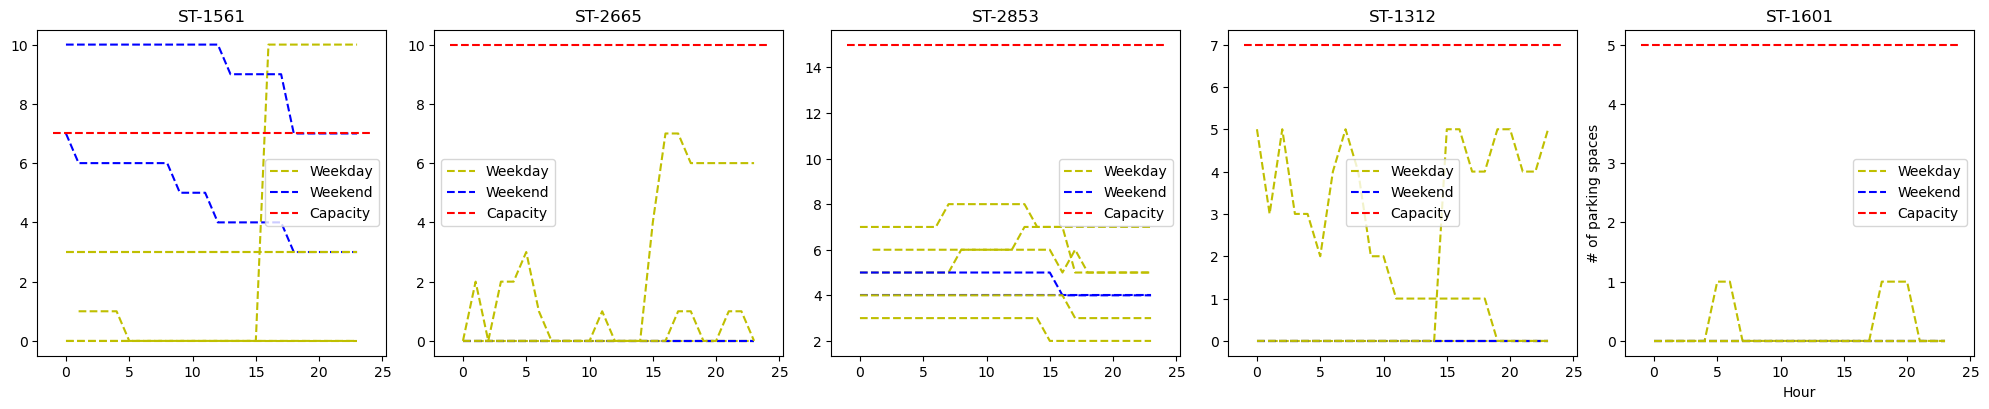

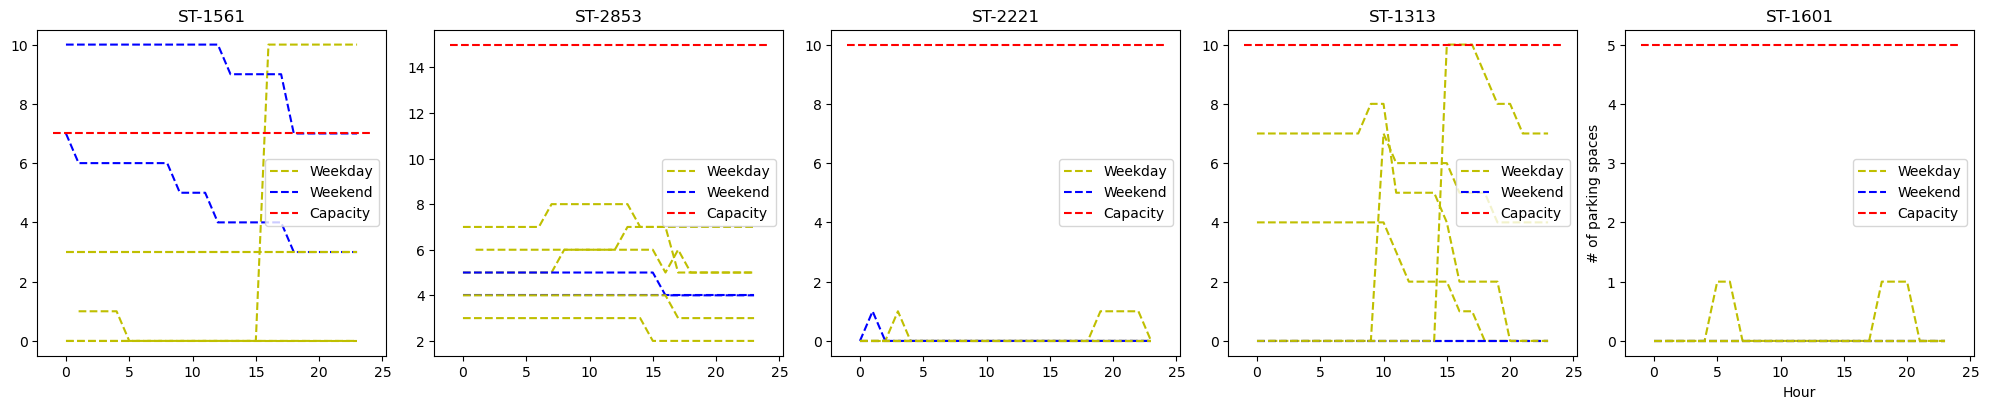

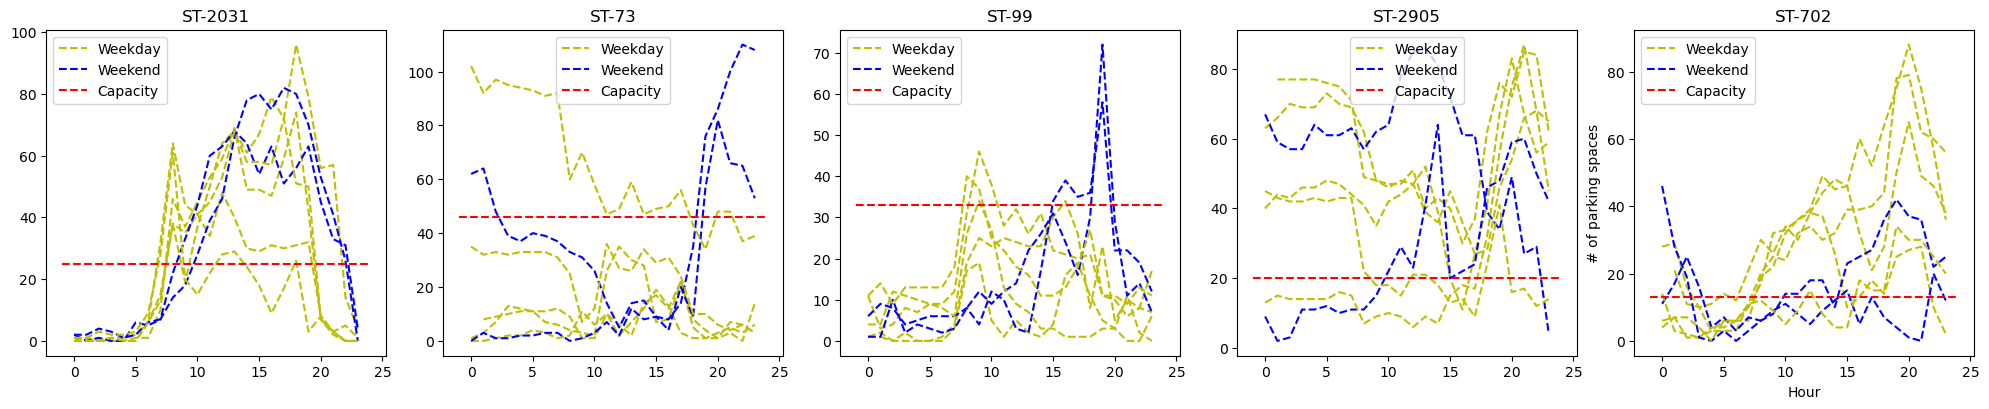

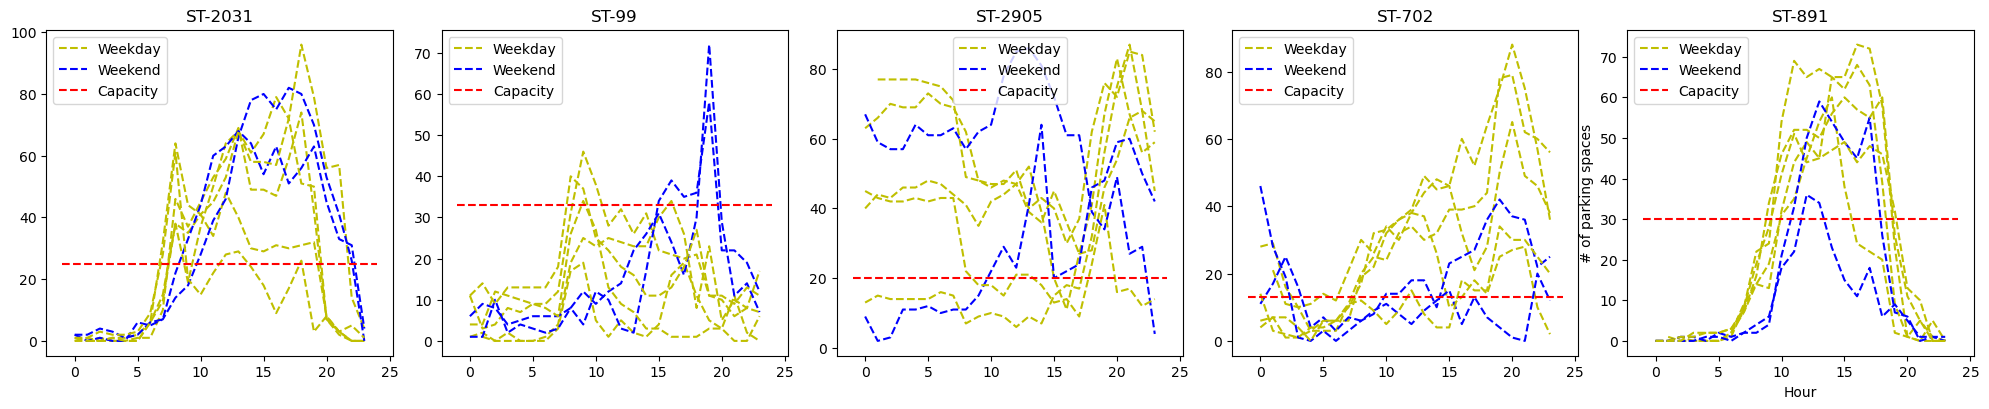

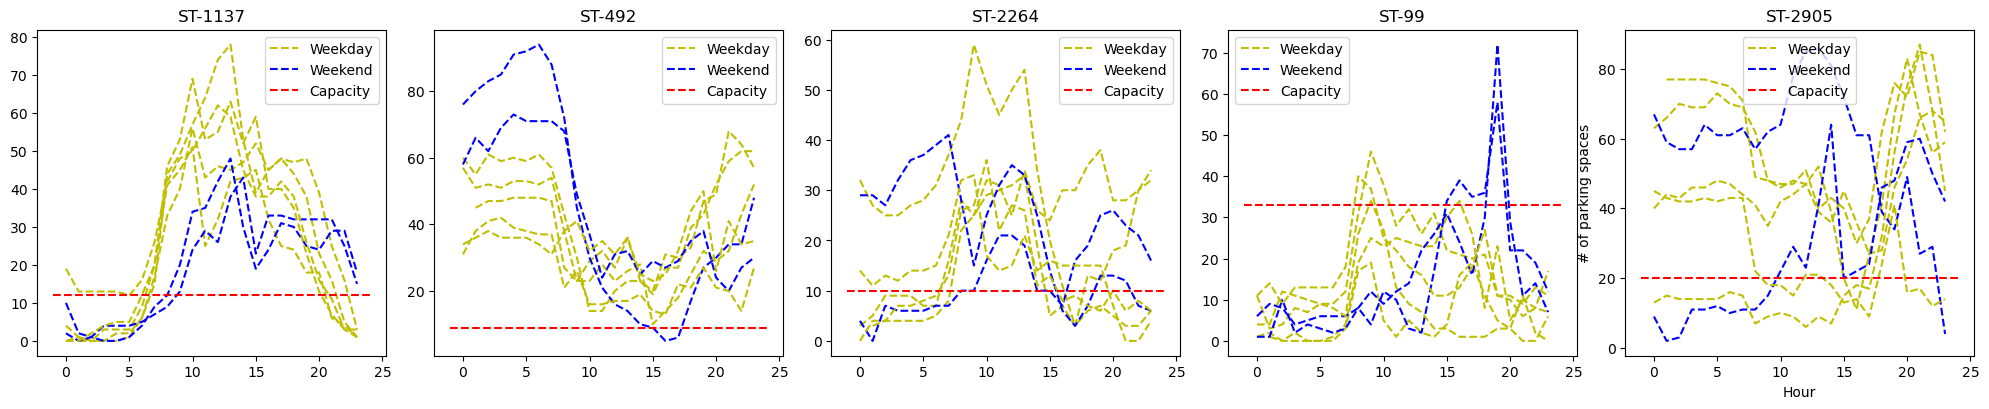

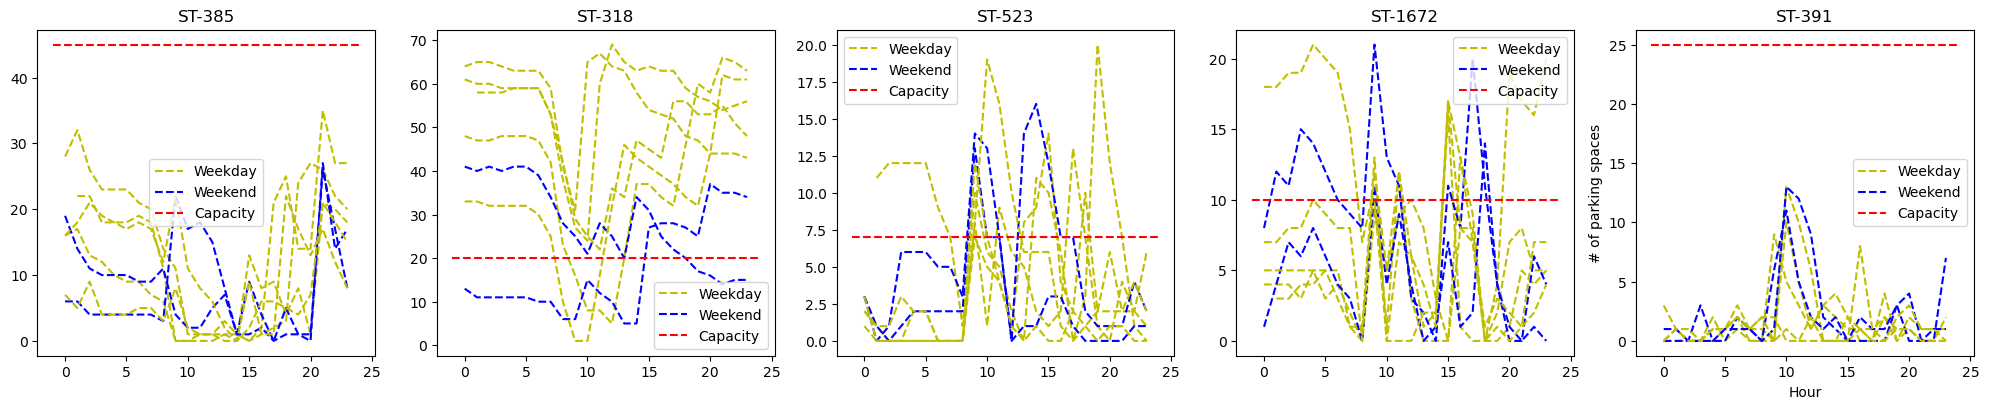

In [130]:
for part in [start_low, end_low, start_high, end_high, uneq_high, uneq_low] :
    tmp_park = aaa_park.loc[part, :]
    tmp_tot = aaa_tot.loc[part, :]
    plt.figure(figsize = (20, 4))
    for idx, st in enumerate(tmp_park.index) :
        plt.subplot(1, 5, idx +1)
        plt.title('{}'.format(tmp_park.index[idx]))
        for x in range(7):
            if x == 0 :
                plt.plot(range(1, 24), tmp_park.iloc[idx, :23], 'y--', label = 'Weekday')
            elif (x == 3) :
                plt.plot(range(0, 24), tmp_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'b--', label = 'Weekend')
            elif (x == 4) :
                plt.plot(range(0, 24), tmp_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'b--')
            else :
                plt.plot(range(0, 24), tmp_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'y--')
        plt.plot(range(-1, 25), [tmp_tot.iloc[idx,0]]*26, '--r', label = 'Capacity')
        plt.legend()
    plt.tight_layout()
    plt.xlabel('Hour')
    plt.ylabel('# of parking spaces')
    plt.savefig('{}.png'.format(part), facecolor='#eeeeee', dpi = 1000)
    plt.show()

In [162]:
uneq['합'] = uneq.iloc[:,:2].sum(axis = 1)
uneq['비율'] = uneq['대여-반납'] / uneq['합']
uneq[(uneq['비율'] > -0.00004) &(uneq['비율'] < 0.00004)]

,대여,반납,대여-반납,합,비율
대여소,,,,,
ST-169,13998.0,13997.0,1.0,27995.0,0.000036
ST-1132,12600.0,12599.0,1.0,25199.0,0.000040
ST-91,19311.0,19310.0,1.0,38621.0,0.000026
ST-1503,13011.0,13011.0,0.0,26022.0,0.000000
ST-2695,8.0,8.0,0.0,16.0,0.000000
ST-1871,5496.0,5496.0,0.0,10992.0,0.000000
ST-1018,26094.0,26096.0,-2.0,52190.0,-0.000038


In [163]:
# 대여소 용량 구하기
start_time = time.time()
need = uneq[(uneq['비율'] > -0.00004) &(uneq['비율'] < 0.00004)].index
key = '486d7a70666c6565313039487463564a'
tmp5 = pd.DataFrame()
for x in range(1, 10) :
    response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, 2022101201))
    try :
        for idx in range(response.json()['getStationListHist']['list_total_count']) :
            tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
            if tmp1 in need :
                tmp2 = int(response.json()['getStationListHist']['row'][idx]['rackTotCnt'])
                tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                tmp5 = pd.concat([tmp5, tmp4])
            else :
                pass
    except :
        pass
print(time.time()-start_time, '초', len(tmp5))
aaa_tot = tmp5.iloc[:int(len(tmp5) / 2),:]

17.962332248687744 초 12


In [165]:
need = aaa_tot.index

In [166]:
need

Index(['ST-1018', 'ST-1132', 'ST-1503', 'ST-169', 'ST-1871', 'ST-91'], dtype='object')

In [167]:
# 한시간 짜리 
start_time = time.time()
list_yyyymmddhh = []
for D in range(2,9) :
    for HH in range(0, 24) :
        list_yyyymmddhh.append(str(2022101) + str(D) + '{:0>2}'.format(HH))
print(len(list_yyyymmddhh), list_yyyymmddhh)

aaa_park = pd.DataFrame()
for YYYY in tqdm(list_yyyymmddhh) :
    tmp5 = pd.DataFrame()
    key = '486d7a70666c6565313039487463564a'
    for x in range(1, 10) :
        response = requests.get('http://openapi.seoul.go.kr:8088/{}/json/bikeListHist/{}/{}/{}'.format(key, 1000*(x-1) + 1, 1000*x, YYYY))
        try :
            for idx in range(response.json()['getStationListHist']['list_total_count']) :
                tmp1 = response.json()['getStationListHist']['row'][idx]['stationId']
                if tmp1 in need :
                    tmp2 = int(response.json()['getStationListHist']['row'][idx]['parkingBikeTotCnt'])
                    tmp3 = int(response.json()['getStationListHist']['row'][idx]['stationDt'])
                    tmp4 = pd.DataFrame([tmp2], [tmp1], columns = [tmp3])
                    tmp5 = pd.concat([tmp5, tmp4])
                else :
                    pass
        except :
            pass
    aaa_park = pd.concat([aaa_park, tmp5], axis = 1)
try :
    aaa_park = aaa_park.iloc[:int(len(aaa_park))/2,:]
except :
    pass
print(time.time() - start_time)

168 ['2022101200', '2022101201', '2022101202', '2022101203', '2022101204', '2022101205', '2022101206', '2022101207', '2022101208', '2022101209', '2022101210', '2022101211', '2022101212', '2022101213', '2022101214', '2022101215', '2022101216', '2022101217', '2022101218', '2022101219', '2022101220', '2022101221', '2022101222', '2022101223', '2022101300', '2022101301', '2022101302', '2022101303', '2022101304', '2022101305', '2022101306', '2022101307', '2022101308', '2022101309', '2022101310', '2022101311', '2022101312', '2022101313', '2022101314', '2022101315', '2022101316', '2022101317', '2022101318', '2022101319', '2022101320', '2022101321', '2022101322', '2022101323', '2022101400', '2022101401', '2022101402', '2022101403', '2022101404', '2022101405', '2022101406', '2022101407', '2022101408', '2022101409', '2022101410', '2022101411', '2022101412', '2022101413', '2022101414', '2022101415', '2022101416', '2022101417', '2022101418', '2022101419', '2022101420', '2022101421', '2022101422', '

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [47:11<00:00, 16.85s/it]

2831.2564368247986


In [169]:
aaa_park

,2022101201,2022101202,2022101203,2022101204,2022101205,2022101206,2022101207,2022101208,2022101209,2022101210,...,2022101814,2022101815,2022101816,2022101817,2022101818,2022101819,2022101820,2022101821,2022101822,2022101823
ST-1018,22,21,20,20,20,19,17,9,4,4,...,3,7,7,3,4,9,9,15,11,12
ST-1132,0,0,0,0,0,0,0,1,5,13,...,13,15,14,14,12,15,13,11,8,2
ST-1503,3,2,2,2,2,2,5,8,11,15,...,15,17,15,13,10,11,12,7,3,0
ST-169,2,2,2,2,2,1,2,4,3,2,...,1,3,1,0,0,1,0,4,5,4
ST-1871,13,13,13,15,14,15,16,15,14,12,...,2,1,0,0,0,2,3,5,6,7
ST-91,5,3,2,2,2,3,8,4,17,26,...,30,31,31,30,14,0,3,4,0,2
ST-1018,22,21,20,20,19,18,15,8,3,4,...,3,7,3,2,8,10,10,12,11,13
ST-1132,0,0,0,0,0,0,0,2,5,15,...,13,15,14,14,14,16,14,11,8,1
ST-1503,2,2,2,2,2,2,6,8,12,16,...,16,17,15,13,10,12,11,7,1,0
ST-169,2,2,2,2,1,1,3,4,3,3,...,2,3,1,1,0,1,0,3,4,4


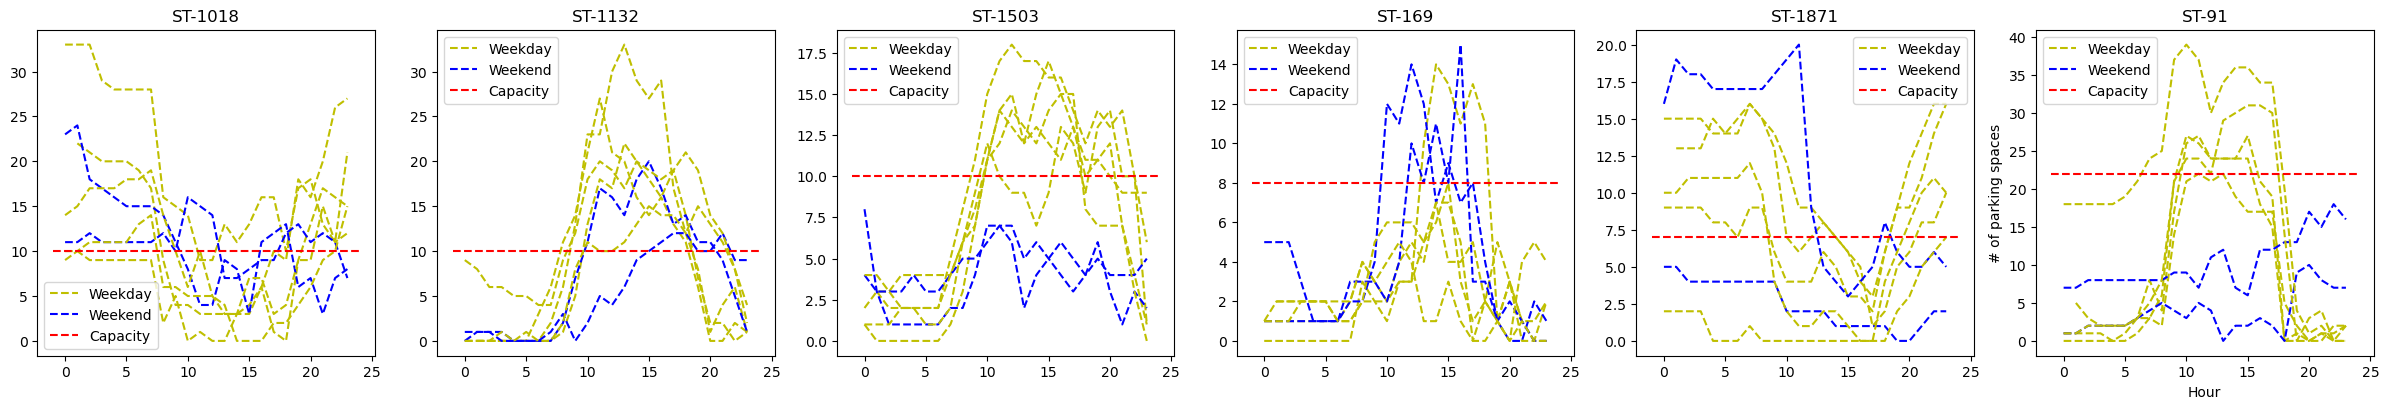

In [170]:
plt.figure(figsize = (24, 4))
for idx, st in enumerate(aaa_park.iloc[:6,].index) :
    plt.subplot(1, 6, idx +1)
    plt.title('{}'.format(aaa_park.index[idx]))
    for x in range(7):
        if x == 0 :
            plt.plot(range(1, 24), aaa_park.iloc[idx, :23], 'y--', label = 'Weekday')
        elif (x == 3) :
            plt.plot(range(0, 24), aaa_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'b--', label = 'Weekend')
        elif (x == 4) :
            plt.plot(range(0, 24), aaa_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'b--')
        else :
            plt.plot(range(0, 24), aaa_park.iloc[idx, (23 + 24 * (x-1)) :(23 + 24 * x)], 'y--')
    plt.plot(range(-1, 25), [aaa_tot.iloc[idx,0]]*26, '--r', label = 'Capacity')
    plt.legend()
plt.tight_layout()
plt.xlabel('Hour')
plt.ylabel('# of parking spaces')
plt.savefig('{}.png'.format('Equilibrium'), facecolor='#eeeeee', dpi = 1000)
plt.show()